# EU

In [1]:
import pandas as pd
import xgboost as xgb
import shap
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [3]:
df = pd.read_csv(r"Cfile.csv")
df

,Company Name,Ticker Symbol,Country of Exchange,NAICS National Industry Name,Year,EPS,ROA,ROE,ESG_score,Env_score,Soc_score,Gov_score,ESG_Comb_score,MarketCap
0,Covestro AG,1COV,Germany,Plastics Material and Resin Manufacturing,2016,2.93,5.1,20.1,66.40,70.25,68.00,56.88,66.40,1.387610e+10
1,Covestro AG,1COV,Germany,Plastics Material and Resin Manufacturing,2017,4.17,7.7,20.4,68.66,68.28,74.58,59.31,68.66,2.089835e+10
2,Covestro AG,1COV,Germany,Plastics Material and Resin Manufacturing,2018,12.25,18.6,42.2,73.62,72.78,74.72,73.21,73.62,9.062689e+09
3,Covestro AG,1COV,Germany,Plastics Material and Resin Manufacturing,2019,10.74,16.3,34.2,74.58,69.59,71.77,88.15,74.58,8.503184e+09
4,Covestro AG,1COV,Germany,Plastics Material and Resin Manufacturing,2020,3.26,4.9,10.5,76.25,74.38,69.86,90.37,76.25,1.191101e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6291,Zurich Insurance Group AG,ZURN,Switzerland,Direct Property and Casualty Insurance Carriers,2019,24.28,0.9,13.1,89.93,90.84,91.69,86.64,79.96,6.138598e+10
6292,Zurich Insurance Group AG,ZURN,Switzerland,Direct Property and Casualty Insurance Carriers,2020,27.69,1.0,12.7,88.87,89.60,90.93,85.50,50.53,6.349212e+10
6293,Zurich Insurance Group AG,ZURN,Switzerland,Direct Property and Casualty Insurance Carriers,2021,25.56,0.9,10.5,89.19,86.31,87.95,97.03,76.17,6.604281e+10
6294,Zurich Insurance Group AG,ZURN,Switzerland,Direct Property and Casualty Insurance Carriers,2022,34.66,1.2,13.7,87.89,85.62,87.16,94.72,78.62,7.199106e+10


## Add Market Cap. 

In [5]:
# Assuming your DataFrame is named df and the 'MarketCap' column is already present
bins = [0, 3e8, 2e9, 1e10, 2e11, float('inf')]
labels = ['Micro Cap', 'Small Cap', 'Mid Cap', 'Large Cap', 'Mega Cap']

df['Market Capitalization Category'] = pd.cut(df['MarketCap'], bins=bins, labels=labels, right=False)
df

,Company Name,Ticker Symbol,Country of Exchange,NAICS National Industry Name,Year,EPS,ROA,ROE,ESG_score,Env_score,Soc_score,Gov_score,ESG_Comb_score,MarketCap,Market Capitalization Category
0,Covestro AG,1COV,Germany,Plastics Material and Resin Manufacturing,2016,2.93,5.1,20.1,66.40,70.25,68.00,56.88,66.40,1.387610e+10,Large Cap
1,Covestro AG,1COV,Germany,Plastics Material and Resin Manufacturing,2017,4.17,7.7,20.4,68.66,68.28,74.58,59.31,68.66,2.089835e+10,Large Cap
2,Covestro AG,1COV,Germany,Plastics Material and Resin Manufacturing,2018,12.25,18.6,42.2,73.62,72.78,74.72,73.21,73.62,9.062689e+09,Mid Cap
3,Covestro AG,1COV,Germany,Plastics Material and Resin Manufacturing,2019,10.74,16.3,34.2,74.58,69.59,71.77,88.15,74.58,8.503184e+09,Mid Cap
4,Covestro AG,1COV,Germany,Plastics Material and Resin Manufacturing,2020,3.26,4.9,10.5,76.25,74.38,69.86,90.37,76.25,1.191101e+10,Large Cap
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6291,Zurich Insurance Group AG,ZURN,Switzerland,Direct Property and Casualty Insurance Carriers,2019,24.28,0.9,13.1,89.93,90.84,91.69,86.64,79.96,6.138598e+10,Large Cap
6292,Zurich Insurance Group AG,ZURN,Switzerland,Direct Property and Casualty Insurance Carriers,2020,27.69,1.0,12.7,88.87,89.60,90.93,85.50,50.53,6.349212e+10,Large Cap
6293,Zurich Insurance Group AG,ZURN,Switzerland,Direct Property and Casualty Insurance Carriers,2021,25.56,0.9,10.5,89.19,86.31,87.95,97.03,76.17,6.604281e+10,Large Cap
6294,Zurich Insurance Group AG,ZURN,Switzerland,Direct Property and Casualty Insurance Carriers,2022,34.66,1.2,13.7,87.89,85.62,87.16,94.72,78.62,7.199106e+10,Large Cap


# GAM to predict ESG

In [7]:
import pandas as pd
import numpy as np
from pygam import LinearGAM, s, f, te
import matplotlib.pyplot as plt

# Define predictors and ESG targets
predictors = ['EPS', 'ROA', 'ROE']
esg_targets = ['ESG_score', 'Env_score', 'Soc_score', 'Gov_score', 'ESG_Comb_score']

# Prepare DataFrame: categorical codes
df = df.copy()
df['Country of Exchange'] = df['Country of Exchange'].astype('category')
df['NAICS National Industry Name'] = df['NAICS National Industry Name'].astype('category')
df['Market Capitalization Category'] = df['Market Capitalization Category'].astype('category')

df['Country_code'] = df['Country of Exchange'].cat.codes
df['Industry_code'] = df['NAICS National Industry Name'].cat.codes
df['MCap_code'] = df['Market Capitalization Category'].cat.codes

# Fixed penalty for all terms
fixed_lambda = 0.001

# Loop over ESG targets
for target in esg_targets:
    df_clean = df.dropna(subset=predictors + [target, 'Country_code', 'Industry_code', 'MCap_code']).copy()

    # Create feature matrix
    X_num = df_clean[predictors].values
    X_cat = df_clean[['Country_code', 'Industry_code', 'MCap_code']].values
    X = np.hstack([X_num, X_cat])
    y = df_clean[target].values

    # Build GAM model with all interactions and fixed penalties
    gam = LinearGAM(
        s(0, lam=fixed_lambda) + s(1, lam=fixed_lambda) + s(2, lam=fixed_lambda) +  # EPS, ROA, ROE
        f(3, lam=fixed_lambda) + f(4, lam=fixed_lambda) + f(5, lam=fixed_lambda) +  # Country, Industry, MCap

        # Categorical × Categorical
        te(3, 4, lam=fixed_lambda) +
        te(3, 5, lam=fixed_lambda) +
        te(4, 5, lam=fixed_lambda) +

        # Numeric × Numeric
        te(0, 1, lam=fixed_lambda) +
        te(0, 2, lam=fixed_lambda) +
        te(1, 2, lam=fixed_lambda) +

        # Numeric × Categorical
        te(0, 3, lam=fixed_lambda) +
        te(0, 4, lam=fixed_lambda) +
        te(0, 5, lam=fixed_lambda) +
        te(1, 3, lam=fixed_lambda) +
        te(1, 4, lam=fixed_lambda) +
        te(1, 5, lam=fixed_lambda) +
        te(2, 3, lam=fixed_lambda) +
        te(2, 4, lam=fixed_lambda) +
        te(2, 5, lam=fixed_lambda)
    ).fit(X, y)

    # Print summary
    print(f"\nGAM Summary for Target: {target}")
    gam.summary()


GAM Summary for Target: ESG_score
LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                    501.5688
Link Function:                     IdentityLink Log Likelihood:                                -37222.3992
Number of Samples:                         6296 AIC:                                             75449.936
                                                AICc:                                           75537.3183
                                                GCV:                                              171.3132
                                                Scale:                                            146.9365
                                                Pseudo R-Squared:                                   0.5985
Fe

C:\Users\fbergsma1\AppData\Local\Temp\ipykernel_3500\553325311.py:62: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

  gam.summary()



GAM Summary for Target: Env_score
LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                    501.5688
Link Function:                     IdentityLink Log Likelihood:                                -39634.4092
Number of Samples:                         6296 AIC:                                             80273.956
                                                AICc:                                           80361.3383
                                                GCV:                                              251.5381
                                                Scale:                                            215.7459
                                                Pseudo R-Squared:                                   0.6532
Fe

C:\Users\fbergsma1\AppData\Local\Temp\ipykernel_3500\553325311.py:62: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

  gam.summary()



GAM Summary for Target: Soc_score
LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                    501.5688
Link Function:                     IdentityLink Log Likelihood:                                -39521.9504
Number of Samples:                         6296 AIC:                                            80049.0384
                                                AICc:                                           80136.4207
                                                GCV:                                              247.0755
                                                Scale:                                            211.9184
                                                Pseudo R-Squared:                                   0.5687
Fe

C:\Users\fbergsma1\AppData\Local\Temp\ipykernel_3500\553325311.py:62: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

  gam.summary()



GAM Summary for Target: Gov_score
LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                    501.5688
Link Function:                     IdentityLink Log Likelihood:                                -40788.1318
Number of Samples:                         6296 AIC:                                            82581.4013
                                                AICc:                                           82668.7836
                                                GCV:                                              302.2333
                                                Scale:                                            259.2275
                                                Pseudo R-Squared:                                   0.4843
Fe

C:\Users\fbergsma1\AppData\Local\Temp\ipykernel_3500\553325311.py:62: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

  gam.summary()



GAM Summary for Target: ESG_Comb_score
LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                    501.5688
Link Function:                     IdentityLink Log Likelihood:                                -38066.5217
Number of Samples:                         6296 AIC:                                            77138.1811
                                                AICc:                                           77225.5634
                                                GCV:                                              195.9698
                                                Scale:                                            168.0846
                                                Pseudo R-Squared:                                   0.48

C:\Users\fbergsma1\AppData\Local\Temp\ipykernel_3500\553325311.py:62: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

  gam.summary()


In [18]:
import os
import pickle
import numpy as np
# from pygam import LinearGAM, s, f, te  # Ensure this is not overwritten!

# Directory to save models
model_dir = 'saved_gam_models'
os.makedirs(model_dir, exist_ok=True)

# Loop over ESG targets
for target in esg_targets:
    df_clean = df.dropna(subset=predictors + [target, 'Country_code', 'Industry_code', 'MCap_code']).copy()

    # Create feature matrix
    X_num = df_clean[predictors].values
    X_cat = df_clean[['Country_code', 'Industry_code', 'MCap_code']].values
    X = np.hstack([X_num, X_cat])
    y = df_clean[target].values

    # Build GAM model
    gam = LinearGAM(
        s(0, lam=fixed_lambda) + s(1, lam=fixed_lambda) + s(2, lam=fixed_lambda) +  # Numeric terms
        f(3, lam=fixed_lambda) + f(4, lam=fixed_lambda) + f(5, lam=fixed_lambda) +  # Factor terms
        te(3, 4, lam=fixed_lambda) + te(3, 5, lam=fixed_lambda) + te(4, 5, lam=fixed_lambda) +  # Cat × Cat
        te(0, 1, lam=fixed_lambda) + te(0, 2, lam=fixed_lambda) + te(1, 2, lam=fixed_lambda) +  # Num × Num
        te(0, 3, lam=fixed_lambda) + te(0, 4, lam=fixed_lambda) + te(0, 5, lam=fixed_lambda) +  # Num × Cat
        te(1, 3, lam=fixed_lambda) + te(1, 4, lam=fixed_lambda) + te(1, 5, lam=fixed_lambda) +
        te(2, 3, lam=fixed_lambda) + te(2, 4, lam=fixed_lambda) + te(2, 5, lam=fixed_lambda)
    ).fit(X, y)
    
        # After fitting each model in your loop
    y_pred = gam.predict(X)
    
    # Check min and max values
    min_pred = y_pred.min()
    max_pred = y_pred.max()
    
    print(f"🔍 Predicted {target} range: {min_pred:.2f} to {max_pred:.2f}")
    if (min_pred < 0) or (max_pred > 100):
        print(f"⚠️ Warning: Predicted values for {target} are outside the 0–100 range!")
    else:
        print(f"✅ All predicted values for {target} are within the 0–100 range.")


    # Save model
    model_path = os.path.join(model_dir, f'gam_model_{target}.pkl')
    with open(model_path, 'wb') as file_handle:  # renamed from `f` to `file_handle`
        pickle.dump(gam, file_handle)

    print(f"✅ Saved model for {target} to {model_path}")

🔍 Predicted ESG_score range: 7.71 to 97.60
✅ All predicted values for ESG_score are within the 0–100 range.
✅ Saved model for ESG_score to saved_gam_models\gam_model_ESG_score.pkl
🔍 Predicted Env_score range: -9.57 to 112.81
⚠️ Warning: Predicted values for Env_score are outside the 0–100 range!
✅ Saved model for Env_score to saved_gam_models\gam_model_Env_score.pkl
🔍 Predicted Soc_score range: -2.76 to 104.72
⚠️ Warning: Predicted values for Soc_score are outside the 0–100 range!
✅ Saved model for Soc_score to saved_gam_models\gam_model_Soc_score.pkl
🔍 Predicted Gov_score range: -1.18 to 109.65
⚠️ Warning: Predicted values for Gov_score are outside the 0–100 range!
✅ Saved model for Gov_score to saved_gam_models\gam_model_Gov_score.pkl
🔍 Predicted ESG_Comb_score range: 5.03 to 94.21
✅ All predicted values for ESG_Comb_score are within the 0–100 range.
✅ Saved model for ESG_Comb_score to saved_gam_models\gam_model_ESG_Comb_score.pkl


# 0 - 100 try again 08-07-2025


GAM Summary for Target: ESG_score
LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                    501.5688
Link Function:                     IdentityLink Log Likelihood:                                -37222.3992
Number of Samples:                         6296 AIC:                                             75449.936
                                                AICc:                                           75537.3183
                                                GCV:                                              171.3132
                                                Scale:                                            146.9365
                                                Pseudo R-Squared:                                   0.5985
Fe

C:\Users\fbergsma1\AppData\Local\Temp\ipykernel_24892\3939501588.py:56: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

  gam.summary()


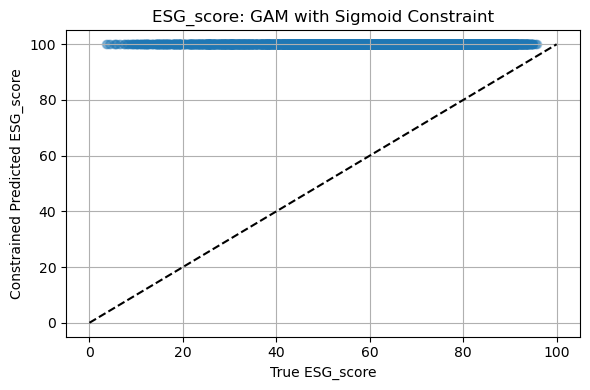


GAM Summary for Target: Env_score
LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                    501.5688
Link Function:                     IdentityLink Log Likelihood:                                -39634.4092
Number of Samples:                         6296 AIC:                                             80273.956
                                                AICc:                                           80361.3383
                                                GCV:                                              251.5381
                                                Scale:                                            215.7459
                                                Pseudo R-Squared:                                   0.6532
Fe

C:\Users\fbergsma1\AppData\Local\Temp\ipykernel_24892\3939501588.py:56: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

  gam.summary()


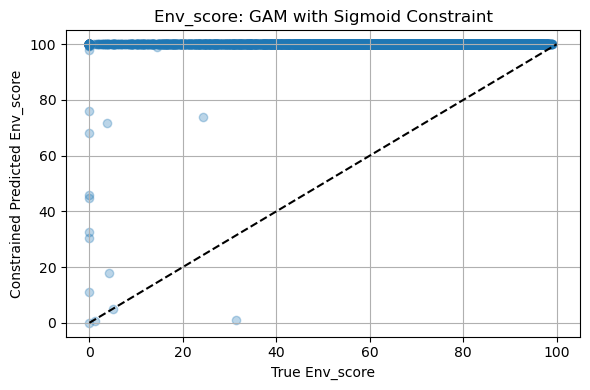


GAM Summary for Target: Soc_score
LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                    501.5688
Link Function:                     IdentityLink Log Likelihood:                                -39521.9504
Number of Samples:                         6296 AIC:                                            80049.0384
                                                AICc:                                           80136.4207
                                                GCV:                                              247.0755
                                                Scale:                                            211.9184
                                                Pseudo R-Squared:                                   0.5687
Fe

C:\Users\fbergsma1\AppData\Local\Temp\ipykernel_24892\3939501588.py:56: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

  gam.summary()


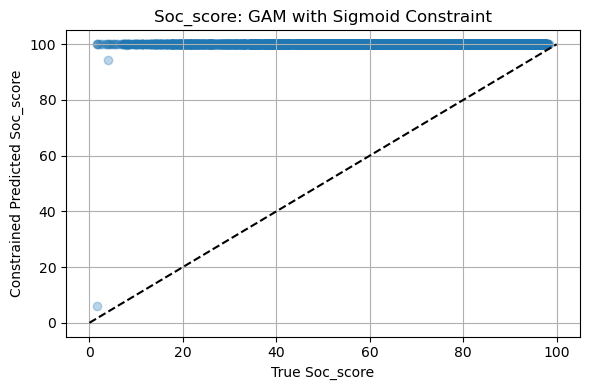


GAM Summary for Target: Gov_score
LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                    501.5688
Link Function:                     IdentityLink Log Likelihood:                                -40788.1318
Number of Samples:                         6296 AIC:                                            82581.4013
                                                AICc:                                           82668.7836
                                                GCV:                                              302.2333
                                                Scale:                                            259.2275
                                                Pseudo R-Squared:                                   0.4843
Fe

C:\Users\fbergsma1\AppData\Local\Temp\ipykernel_24892\3939501588.py:56: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

  gam.summary()


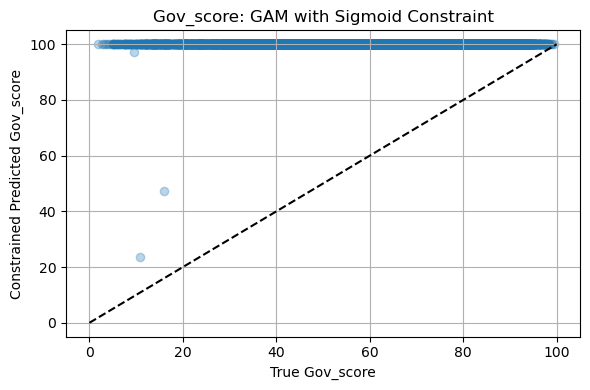


GAM Summary for Target: ESG_Comb_score
LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                    501.5688
Link Function:                     IdentityLink Log Likelihood:                                -38066.5217
Number of Samples:                         6296 AIC:                                            77138.1811
                                                AICc:                                           77225.5634
                                                GCV:                                              195.9698
                                                Scale:                                            168.0846
                                                Pseudo R-Squared:                                   0.48

C:\Users\fbergsma1\AppData\Local\Temp\ipykernel_24892\3939501588.py:56: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

  gam.summary()


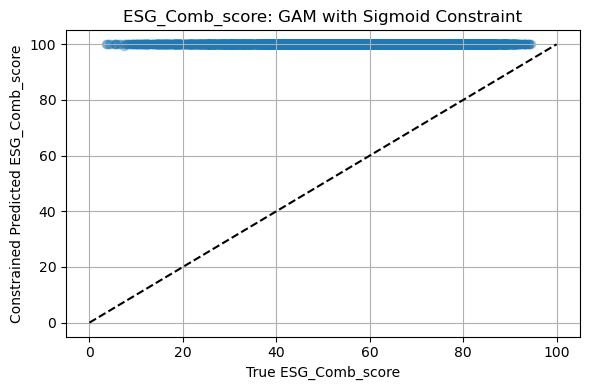

In [22]:
import pandas as pd
import numpy as np
from pygam import LinearGAM, s, f, te
import matplotlib.pyplot as plt

# Sigmoid function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Define predictors and ESG targets
predictors = ['EPS', 'ROA', 'ROE']
esg_targets = ['ESG_score', 'Env_score', 'Soc_score', 'Gov_score', 'ESG_Comb_score']

# Prepare DataFrame: categorical codes
df = df.copy()
df['Country of Exchange'] = df['Country of Exchange'].astype('category')
df['NAICS National Industry Name'] = df['NAICS National Industry Name'].astype('category')
df['Market Capitalization Category'] = df['Market Capitalization Category'].astype('category')

df['Country_code'] = df['Country of Exchange'].cat.codes
df['Industry_code'] = df['NAICS National Industry Name'].cat.codes
df['MCap_code'] = df['Market Capitalization Category'].cat.codes

# Fixed penalty for all terms
fixed_lambda = 0.001

# Loop over ESG targets
for target in esg_targets:
    df_clean = df.dropna(subset=predictors + [target, 'Country_code', 'Industry_code', 'MCap_code']).copy()

    # Create feature matrix
    X_num = df_clean[predictors].values
    X_cat = df_clean[['Country_code', 'Industry_code', 'MCap_code']].values
    X = np.hstack([X_num, X_cat])
    y = df_clean[target].values

    # Build and fit GAM
    gam = LinearGAM(
        s(0, lam=fixed_lambda) + s(1, lam=fixed_lambda) + s(2, lam=fixed_lambda) +  # EPS, ROA, ROE
        f(3, lam=fixed_lambda) + f(4, lam=fixed_lambda) + f(5, lam=fixed_lambda) +  # Country, Industry, MCap
        te(3, 4, lam=fixed_lambda) + te(3, 5, lam=fixed_lambda) + te(4, 5, lam=fixed_lambda) +  # Cat-Cat
        te(0, 1, lam=fixed_lambda) + te(0, 2, lam=fixed_lambda) + te(1, 2, lam=fixed_lambda) +  # Num-Num
        te(0, 3, lam=fixed_lambda) + te(0, 4, lam=fixed_lambda) + te(0, 5, lam=fixed_lambda) +  # Num-Cat
        te(1, 3, lam=fixed_lambda) + te(1, 4, lam=fixed_lambda) + te(1, 5, lam=fixed_lambda) +
        te(2, 3, lam=fixed_lambda) + te(2, 4, lam=fixed_lambda) + te(2, 5, lam=fixed_lambda)
    ).fit(X, y)

    # Raw predictions
    y_raw_pred = gam.predict(X)

    # Apply sigmoid-based constraint to map to [0, 100]
    y_constrained_pred = 100 * sigmoid(y_raw_pred)

    # Print summary
    print(f"\nGAM Summary for Target: {target}")
    gam.summary()

    # Optionally plot
    plt.figure(figsize=(6, 4))
    plt.scatter(y, y_constrained_pred, alpha=0.3)
    plt.xlabel(f"True {target}")
    plt.ylabel(f"Constrained Predicted {target}")
    plt.title(f"{target}: GAM with Sigmoid Constraint")
    plt.plot([0, 100], [0, 100], 'k--')
    plt.grid(True)
    plt.tight_layout()
    plt.show()


In [24]:
import os
import pickle
import numpy as np
from pygam import LinearGAM, s, f, te

# Sigmoid function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Directory to save models
model_dir = 'saved_gam_models'
os.makedirs(model_dir, exist_ok=True)

# Loop over ESG targets
for target in esg_targets:
    df_clean = df.dropna(subset=predictors + [target, 'Country_code', 'Industry_code', 'MCap_code']).copy()

    # Create feature matrix
    X_num = df_clean[predictors].values
    X_cat = df_clean[['Country_code', 'Industry_code', 'MCap_code']].values
    X = np.hstack([X_num, X_cat])
    y = df_clean[target].values

    # Build GAM model
    gam = LinearGAM(
        s(0, lam=fixed_lambda) + s(1, lam=fixed_lambda) + s(2, lam=fixed_lambda) +  # Numeric terms
        f(3, lam=fixed_lambda) + f(4, lam=fixed_lambda) + f(5, lam=fixed_lambda) +  # Factor terms
        te(3, 4, lam=fixed_lambda) + te(3, 5, lam=fixed_lambda) + te(4, 5, lam=fixed_lambda) +  # Cat × Cat
        te(0, 1, lam=fixed_lambda) + te(0, 2, lam=fixed_lambda) + te(1, 2, lam=fixed_lambda) +  # Num × Num
        te(0, 3, lam=fixed_lambda) + te(0, 4, lam=fixed_lambda) + te(0, 5, lam=fixed_lambda) +  # Num × Cat
        te(1, 3, lam=fixed_lambda) + te(1, 4, lam=fixed_lambda) + te(1, 5, lam=fixed_lambda) +
        te(2, 3, lam=fixed_lambda) + te(2, 4, lam=fixed_lambda) + te(2, 5, lam=fixed_lambda)
    ).fit(X, y)

    # Get sigmoid-transformed predictions in [0, 100]
    raw_pred = gam.predict(X)
    y_pred = 100 * sigmoid(raw_pred)

    # Check min and max values
    min_pred = y_pred.min()
    max_pred = y_pred.max()

    print(f"\n🔍 Predicted {target} range after sigmoid transform: {min_pred:.2f} to {max_pred:.2f}")
    if (min_pred < 0) or (max_pred > 100):
        print(f"⚠️ Warning: Predictions for {target} are still outside the 0–100 range!")
    else:
        print(f"✅ All predictions for {target} are within the 0–100 range.")

    # Save raw model (before sigmoid)
    model_path = os.path.join(model_dir, f'gam_model_{target}.pkl')
    with open(model_path, 'wb') as file_handle:
        pickle.dump(gam, file_handle)

    print(f"✅ Saved model for {target} to {model_path}")



🔍 Predicted ESG_score range after sigmoid transform: 99.96 to 100.00
✅ All predictions for ESG_score are within the 0–100 range.
✅ Saved model for ESG_score to saved_gam_models\gam_model_ESG_score.pkl

🔍 Predicted Env_score range after sigmoid transform: 0.01 to 100.00
✅ All predictions for Env_score are within the 0–100 range.
✅ Saved model for Env_score to saved_gam_models\gam_model_Env_score.pkl

🔍 Predicted Soc_score range after sigmoid transform: 5.93 to 100.00
✅ All predictions for Soc_score are within the 0–100 range.
✅ Saved model for Soc_score to saved_gam_models\gam_model_Soc_score.pkl

🔍 Predicted Gov_score range after sigmoid transform: 23.48 to 100.00
✅ All predictions for Gov_score are within the 0–100 range.
✅ Saved model for Gov_score to saved_gam_models\gam_model_Gov_score.pkl

🔍 Predicted ESG_Comb_score range after sigmoid transform: 99.35 to 100.00
✅ All predictions for ESG_Comb_score are within the 0–100 range.
✅ Saved model for ESG_Comb_score to saved_gam_models\g

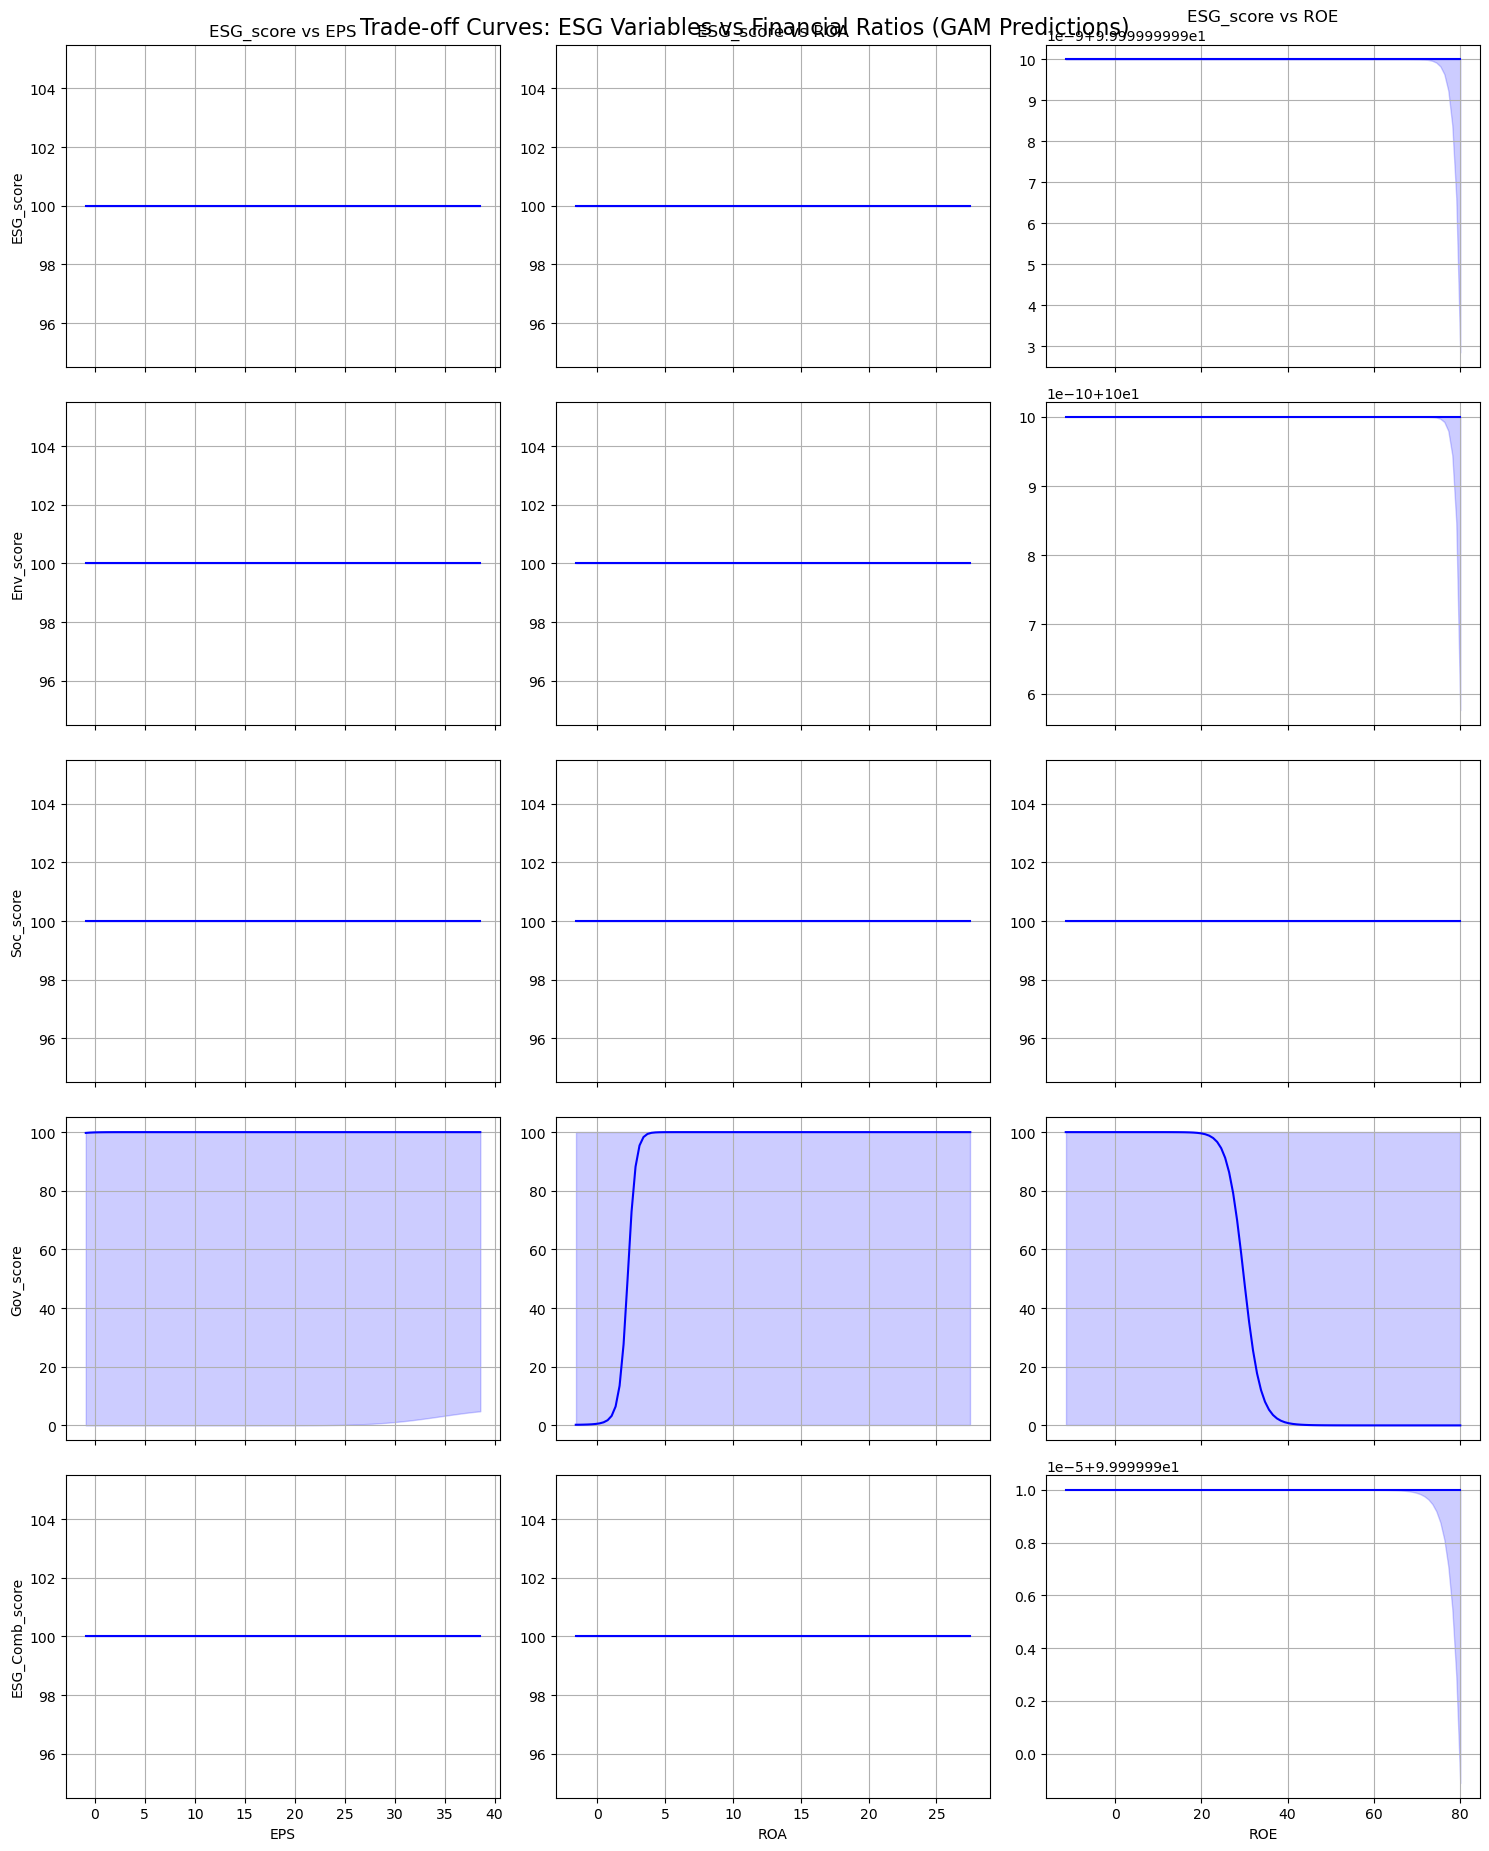

In [26]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
import os
from pygam import LinearGAM  # just to clarify import for gam

# Sigmoid function for transformation
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Define predictors and ESG targets
predictors = ['EPS', 'ROA', 'ROE']
esg_targets = ['ESG_score', 'Env_score', 'Soc_score', 'Gov_score', 'ESG_Comb_score']

# Directory where models are saved
model_dir = 'saved_gam_models'

# Prepare figure
fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(15, 20), sharex='col')
fig.suptitle('Trade-off Curves: ESG Variables vs Financial Ratios (GAM Predictions)', fontsize=16, y=0.92)

for row_idx, target in enumerate(esg_targets):
    # Load GAM model for current ESG target
    model_path = os.path.join(model_dir, f'gam_model_{target}.pkl')
    with open(model_path, 'rb') as file_handle:
        gam = pickle.load(file_handle)

    # Clean data
    df_clean = df.dropna(subset=predictors + [target, 'Country_code', 'Industry_code', 'MCap_code']).copy()

    # Build input matrix
    X_num = df_clean[predictors].values
    X_cat = df_clean[['Country_code', 'Industry_code', 'MCap_code']].values
    X_train = np.hstack([X_num, X_cat])

    # Median baseline for other features
    X_baseline = np.median(X_train, axis=0)

    # Map feature names to indices
    feature_indices = {name: idx for idx, name in enumerate(predictors + ['Country_code', 'Industry_code', 'MCap_code'])}

    for col_idx, fin_ratio in enumerate(predictors):
        idx_fin = feature_indices[fin_ratio]

        # Limit the grid to 1st-99th percentile of that feature in training data
        fin_min, fin_max = np.quantile(X_train[:, idx_fin], [0.01, 0.99])
        fin_grid = np.linspace(fin_min, fin_max, 100)

        # Construct prediction input: vary current ratio, fix others at median
        X_pred = np.tile(X_baseline, (100, 1))
        X_pred[:, idx_fin] = fin_grid

        # Raw predictions and CI from GAM (untransformed)
        raw_pred = gam.predict(X_pred)
        raw_conf_int = gam.confidence_intervals(X_pred)

        # Transform predictions and CI with sigmoid and scale to 0–100
        esg_pred = sigmoid(raw_pred) * 100
        conf_int_lower = sigmoid(raw_conf_int[:, 0]) * 100
        conf_int_upper = sigmoid(raw_conf_int[:, 1]) * 100

        # Plotting
        ax = axes[row_idx, col_idx]
        ax.plot(fin_grid, esg_pred, label=target, color='blue')
        ax.fill_between(fin_grid, conf_int_lower, conf_int_upper, color='blue', alpha=0.2)
        if row_idx == 0:
            ax.set_title(f'{target} vs {fin_ratio}')
        if col_idx == 0:
            ax.set_ylabel(target)
        if row_idx == 4:
            ax.set_xlabel(fin_ratio)
        ax.grid(True)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


# 0 - 100 try again with new penalty terms

## LinearGam

In [39]:
from pygam import LinearGAM, s, f, te
import numpy as np
import matplotlib.pyplot as plt

# Define predictors and ESG targets
predictors = ['EPS', 'ROA', 'ROE']
categoricals = ['Country_code', 'Industry_code', 'MCap_code']
esg_targets = ['ESG_score', 'Env_score', 'Soc_score', 'Gov_score', 'ESG_Comb_score']

# Encode categorical variables
df = df.copy()
df['Country_code'] = df['Country of Exchange'].astype('category').cat.codes
df['Industry_code'] = df['NAICS National Industry Name'].astype('category').cat.codes
df['MCap_code'] = df['Market Capitalization Category'].astype('category').cat.codes

results = {}
optimal_penalties = {}

for target in esg_targets:
    print(f"\n=== Fitting model for target: {target} ===")
    
    # Drop missing data
    df_clean = df.dropna(subset=predictors + [target] + categoricals).copy()

    # Target stays in its original 0–100 scale
    y = df_clean[target].clip(0.01, 99.99)  # avoid exact 0 or 100

    # Prepare features matrix
    X_num = df_clean[predictors].values
    X_cat = df_clean[categoricals].values.astype(int)
    X = np.hstack([X_num, X_cat])

    # Build LinearGAM with splines, factors, and tensor interactions
    gam = LinearGAM(
        s(0) + s(1) + s(2) +              # Numeric splines
        f(3) + f(4) + f(5) +              # Categorical factors
        te(3, 4) + te(3, 5) + te(4, 5) +  # Cat x Cat interactions
        te(0, 1) + te(0, 2) + te(1, 2) +  # Num x Num interactions
        te(0, 3) + te(0, 4) + te(0, 5) +  # Num x Cat interactions
        te(1, 3) + te(1, 4) + te(1, 5) +
        te(2, 3) + te(2, 4) + te(2, 5)
    )

    # Gridsearch for optimal penalty
    gam.gridsearch(X, y)

    # Save results
    results[target] = gam
    optimal_penalties[target] = gam.lam

    # Print model summary and R²
    print(f"Optimal penalties: {gam.lam}")
    
    # print(gam.summary())

    # # Predict and optionally plot
    # y_pred = gam.predict(X)
    # r2 = gam.statistics_['pseudo_r2']
    # print(f"Pseudo R-squared for {target}: {r2:.4f}")

    # # Plot predicted vs actual
    # plt.figure(figsize=(6, 4))
    # plt.scatter(y, y_pred, alpha=0.3)
    # plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
    # plt.xlabel("Actual")
    # plt.ylabel("Predicted")
    # plt.title(f"{target}: Predicted vs Actual")
    # plt.grid(True)
    # plt.tight_layout()
    # plt.show()


  0% (0 of 11) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--


=== Fitting model for target: ESG_score ===


100% (11 of 11) |########################| Elapsed Time: 0:01:18 Time:  0:01:180:07
  0% (0 of 11) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--

Optimal penalties: [[0.001], [0.001], [0.001], [0.001], [0.001], [0.001], [[0.001], [0.001]], [[0.001], [0.001]], [[0.001], [0.001]], [[0.001], [0.001]], [[0.001], [0.001]], [[0.001], [0.001]], [[0.001], [0.001]], [[0.001], [0.001]], [[0.001], [0.001]], [[0.001], [0.001]], [[0.001], [0.001]], [[0.001], [0.001]], [[0.001], [0.001]], [[0.001], [0.001]], [[0.001], [0.001]]]

=== Fitting model for target: Env_score ===


100% (11 of 11) |########################| Elapsed Time: 0:01:24 Time:  0:01:240:07
  0% (0 of 11) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--

Optimal penalties: [[0.001], [0.001], [0.001], [0.001], [0.001], [0.001], [[0.001], [0.001]], [[0.001], [0.001]], [[0.001], [0.001]], [[0.001], [0.001]], [[0.001], [0.001]], [[0.001], [0.001]], [[0.001], [0.001]], [[0.001], [0.001]], [[0.001], [0.001]], [[0.001], [0.001]], [[0.001], [0.001]], [[0.001], [0.001]], [[0.001], [0.001]], [[0.001], [0.001]], [[0.001], [0.001]]]

=== Fitting model for target: Soc_score ===


100% (11 of 11) |########################| Elapsed Time: 0:01:24 Time:  0:01:240:07
  0% (0 of 11) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--

Optimal penalties: [[0.001], [0.001], [0.001], [0.001], [0.001], [0.001], [[0.001], [0.001]], [[0.001], [0.001]], [[0.001], [0.001]], [[0.001], [0.001]], [[0.001], [0.001]], [[0.001], [0.001]], [[0.001], [0.001]], [[0.001], [0.001]], [[0.001], [0.001]], [[0.001], [0.001]], [[0.001], [0.001]], [[0.001], [0.001]], [[0.001], [0.001]], [[0.001], [0.001]], [[0.001], [0.001]]]

=== Fitting model for target: Gov_score ===


100% (11 of 11) |########################| Elapsed Time: 0:01:23 Time:  0:01:230:07
  0% (0 of 11) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--

Optimal penalties: [[0.001], [0.001], [0.001], [0.001], [0.001], [0.001], [[0.001], [0.001]], [[0.001], [0.001]], [[0.001], [0.001]], [[0.001], [0.001]], [[0.001], [0.001]], [[0.001], [0.001]], [[0.001], [0.001]], [[0.001], [0.001]], [[0.001], [0.001]], [[0.001], [0.001]], [[0.001], [0.001]], [[0.001], [0.001]], [[0.001], [0.001]], [[0.001], [0.001]], [[0.001], [0.001]]]

=== Fitting model for target: ESG_Comb_score ===


100% (11 of 11) |########################| Elapsed Time: 0:01:13 Time:  0:01:130:06


Optimal penalties: [[0.001], [0.001], [0.001], [0.001], [0.001], [0.001], [[0.001], [0.001]], [[0.001], [0.001]], [[0.001], [0.001]], [[0.001], [0.001]], [[0.001], [0.001]], [[0.001], [0.001]], [[0.001], [0.001]], [[0.001], [0.001]], [[0.001], [0.001]], [[0.001], [0.001]], [[0.001], [0.001]], [[0.001], [0.001]], [[0.001], [0.001]], [[0.001], [0.001]], [[0.001], [0.001]]]



=== Fitting GAM with fixed λ=0.001 for: ESG_score ===
Pseudo R²: 0.5985
LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                    501.5688
Link Function:                     IdentityLink Log Likelihood:                                -37222.3992
Number of Samples:                         6296 AIC:                                             75449.936
                                                AICc:                                           75537.3183
                                                GCV:                                              171.3132
                                                Scale:                                            146.9365
                                                Pseudo R-Squared:      

C:\Users\fbergsma1\AppData\Local\Temp\ipykernel_24892\3609383922.py:67: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

  print(gam.summary())


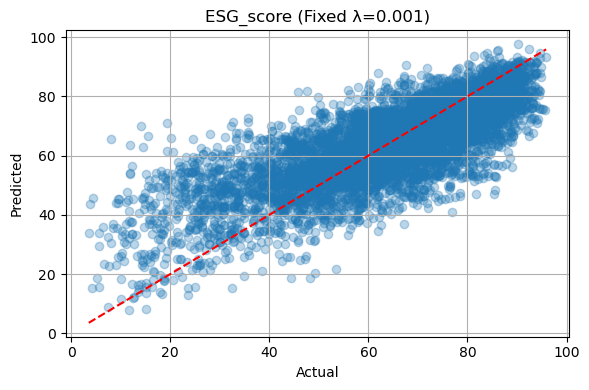


=== Fitting GAM with fixed λ=0.001 for: Env_score ===
Pseudo R²: 0.6532
LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                    501.5688
Link Function:                     IdentityLink Log Likelihood:                                -39634.1244
Number of Samples:                         6296 AIC:                                            80273.3864
                                                AICc:                                           80360.7687
                                                GCV:                                              251.5267
                                                Scale:                                            215.7362
                                                Pseudo R-Squared:      

C:\Users\fbergsma1\AppData\Local\Temp\ipykernel_24892\3609383922.py:67: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

  print(gam.summary())


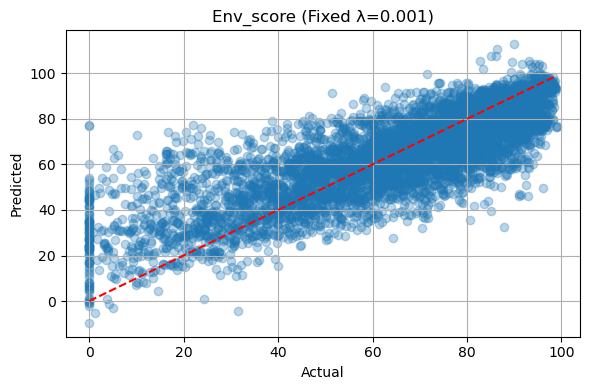


=== Fitting GAM with fixed λ=0.001 for: Soc_score ===
Pseudo R²: 0.5687
LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                    501.5688
Link Function:                     IdentityLink Log Likelihood:                                -39521.9504
Number of Samples:                         6296 AIC:                                            80049.0384
                                                AICc:                                           80136.4207
                                                GCV:                                              247.0755
                                                Scale:                                            211.9184
                                                Pseudo R-Squared:      

C:\Users\fbergsma1\AppData\Local\Temp\ipykernel_24892\3609383922.py:67: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

  print(gam.summary())


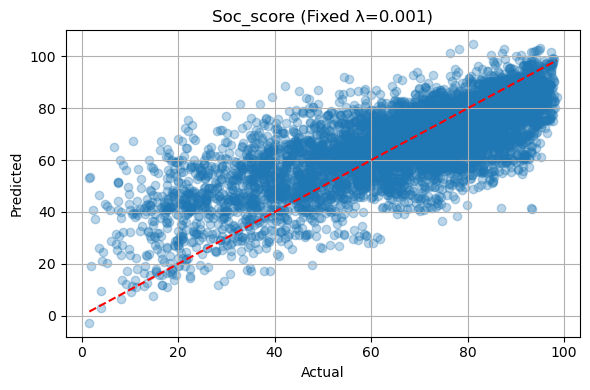


=== Fitting GAM with fixed λ=0.001 for: Gov_score ===
Pseudo R²: 0.4843
LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                    501.5688
Link Function:                     IdentityLink Log Likelihood:                                -40788.1318
Number of Samples:                         6296 AIC:                                            82581.4013
                                                AICc:                                           82668.7836
                                                GCV:                                              302.2333
                                                Scale:                                            259.2275
                                                Pseudo R-Squared:      

C:\Users\fbergsma1\AppData\Local\Temp\ipykernel_24892\3609383922.py:67: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

  print(gam.summary())


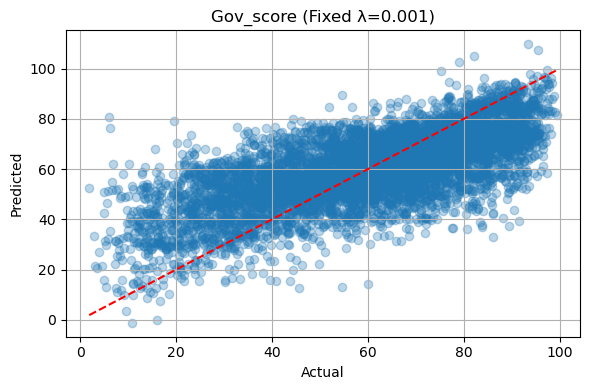


=== Fitting GAM with fixed λ=0.001 for: ESG_Comb_score ===
Pseudo R²: 0.4882
LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                    501.5688
Link Function:                     IdentityLink Log Likelihood:                                -38066.5217
Number of Samples:                         6296 AIC:                                            77138.1811
                                                AICc:                                           77225.5634
                                                GCV:                                              195.9698
                                                Scale:                                            168.0846
                                                Pseudo R-Squared: 

C:\Users\fbergsma1\AppData\Local\Temp\ipykernel_24892\3609383922.py:67: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

  print(gam.summary())


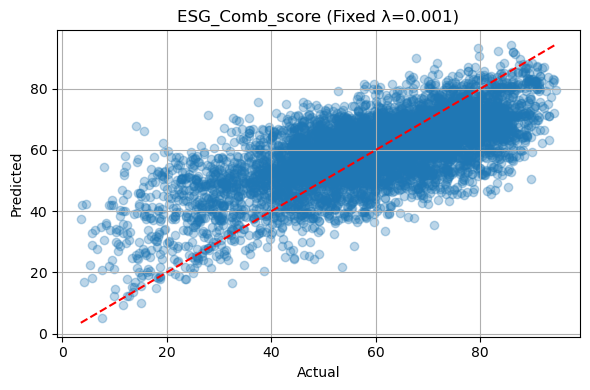

In [47]:
from pygam import LinearGAM, s, f, te
import numpy as np
import matplotlib.pyplot as plt

# Define predictors and ESG targets
predictors = ['EPS', 'ROA', 'ROE']
categoricals = ['Country_code', 'Industry_code', 'MCap_code']
esg_targets = ['ESG_score', 'Env_score', 'Soc_score', 'Gov_score', 'ESG_Comb_score']

# Encode categorical variables
df = df.copy()
df['Country_code'] = df['Country of Exchange'].astype('category').cat.codes
df['Industry_code'] = df['NAICS National Industry Name'].astype('category').cat.codes
df['MCap_code'] = df['Market Capitalization Category'].astype('category').cat.codes

# # Penalty structure: list of 0.001 for each term (same structure as before)
# n_penalties = 21  # 3 splines + 3 factors + 15 tensor terms
# fixed_penalties = [0.001] * n_penalties

# Example: fixed_penalties from the output
fixed_penalties = [[0.001], [0.001], [0.001], [0.001], [0.001], [0.001], 
                   [[0.001], [0.001]], [[0.001], [0.001]], [[0.001], [0.001]], 
                   [[0.001], [0.001]], [[0.001], [0.001]], [[0.001], [0.001]], 
                   [[0.001], [0.001]], [[0.001], [0.001]], [[0.001], [0.001]], 
                   [[0.001], [0.001]], [[0.001], [0.001]], [[0.001], [0.001]], 
                   [[0.001], [0.001]], [[0.001], [0.001]], [[0.001], [0.001]]]

# Flatten all penalty terms to a single list of float values
# flat_lam = [val[0] if isinstance(val, list) and not isinstance(val[0], list) else val[0][0] for val in fixed_penalties]
flat_lam = [0.001] * 36


results = {}

for target in esg_targets:
    print(f"\n=== Fitting GAM with fixed λ=0.001 for: {target} ===")

    df_clean = df.dropna(subset=predictors + [target] + categoricals).copy()
    y = df_clean[target].clip(0.01, 99.99)  # keep in [0.01, 99.99]

    X_num = df_clean[predictors].values
    X_cat = df_clean[categoricals].values.astype(int)
    X = np.hstack([X_num, X_cat])

    # Build GAM model with fixed λs
    gam = LinearGAM(
        s(0) + s(1) + s(2) +              # Splines for numeric vars
        f(3) + f(4) + f(5) +              # Factors for categoricals
        te(3, 4) + te(3, 5) + te(4, 5) +  # Cat x Cat
        te(0, 1) + te(0, 2) + te(1, 2) +  # Num x Num
        te(0, 3) + te(0, 4) + te(0, 5) +  # Num x Cat
        te(1, 3) + te(1, 4) + te(1, 5) +
        te(2, 3) + te(2, 4) + te(2, 5),
        lam=flat_lam
    )
    
    # Fit the model
    gam.fit(X, y)

    results[target] = gam

    # Report
    y_pred = gam.predict(X)
    r2 = gam.statistics_['pseudo_r2']['explained_deviance']
    print(f"Pseudo R²: {r2:.4f}")

    print(gam.summary())

    # Plot
    plt.figure(figsize=(6, 4))
    plt.scatter(y, y_pred, alpha=0.3)
    plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
    plt.xlabel("Actual")
    plt.ylabel("Predicted")
    plt.title(f"{target} (Fixed λ=0.001)")
    plt.grid(True)
    plt.tight_layout()
    plt.show()



=== Fitting GAM with fixed λ=0.001 for: ESG_score ===
✅ All predicted values are within 0–100 range.
✅ Pseudo R² for ESG_score: 0.5985
LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                    501.5688
Link Function:                     IdentityLink Log Likelihood:                                -37222.3992
Number of Samples:                         6296 AIC:                                             75449.936
                                                AICc:                                           75537.3183
                                                GCV:                                              171.3132
                                                Scale:                                            146.9365
        

C:\Users\fbergsma1\AppData\Local\Temp\ipykernel_24892\3104758959.py:67: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

  print(gam.summary())


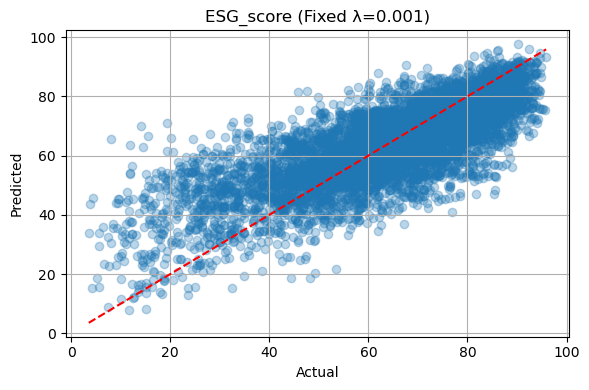


=== Fitting GAM with fixed λ=0.001 for: Env_score ===
⚠️ Warning: Predicted values fall outside expected 0–100 ESG score range.
✅ Pseudo R² for Env_score: 0.6532
LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                    501.5688
Link Function:                     IdentityLink Log Likelihood:                                -39634.1244
Number of Samples:                         6296 AIC:                                            80273.3864
                                                AICc:                                           80360.7687
                                                GCV:                                              251.5267
                                                Scale:                                  

C:\Users\fbergsma1\AppData\Local\Temp\ipykernel_24892\3104758959.py:67: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

  print(gam.summary())


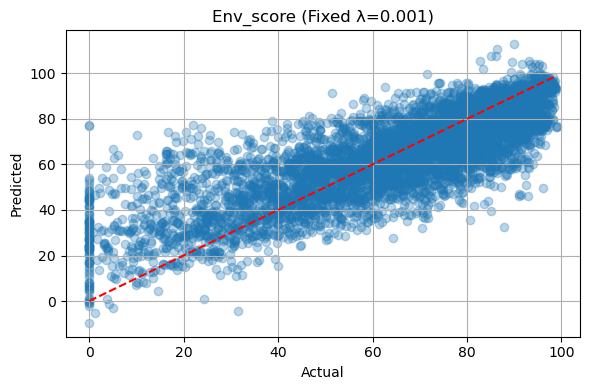


=== Fitting GAM with fixed λ=0.001 for: Soc_score ===
⚠️ Warning: Predicted values fall outside expected 0–100 ESG score range.
✅ Pseudo R² for Soc_score: 0.5687
LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                    501.5688
Link Function:                     IdentityLink Log Likelihood:                                -39521.9504
Number of Samples:                         6296 AIC:                                            80049.0384
                                                AICc:                                           80136.4207
                                                GCV:                                              247.0755
                                                Scale:                                  

C:\Users\fbergsma1\AppData\Local\Temp\ipykernel_24892\3104758959.py:67: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

  print(gam.summary())


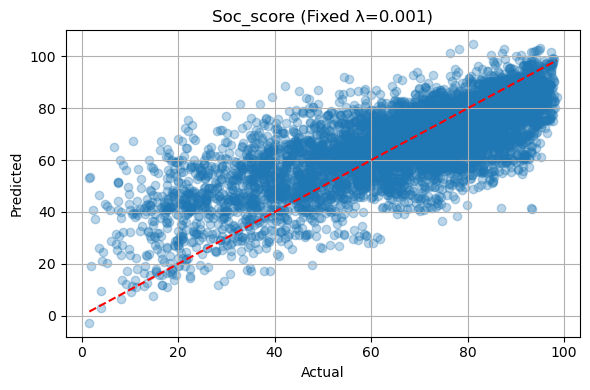


=== Fitting GAM with fixed λ=0.001 for: Gov_score ===
⚠️ Warning: Predicted values fall outside expected 0–100 ESG score range.
✅ Pseudo R² for Gov_score: 0.4843
LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                    501.5688
Link Function:                     IdentityLink Log Likelihood:                                -40788.1318
Number of Samples:                         6296 AIC:                                            82581.4013
                                                AICc:                                           82668.7836
                                                GCV:                                              302.2333
                                                Scale:                                  

C:\Users\fbergsma1\AppData\Local\Temp\ipykernel_24892\3104758959.py:67: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

  print(gam.summary())


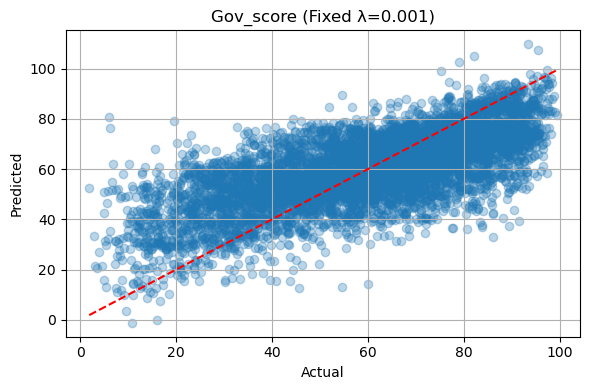


=== Fitting GAM with fixed λ=0.001 for: ESG_Comb_score ===
✅ All predicted values are within 0–100 range.
✅ Pseudo R² for ESG_Comb_score: 0.4882
LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                    501.5688
Link Function:                     IdentityLink Log Likelihood:                                -38066.5217
Number of Samples:                         6296 AIC:                                            77138.1811
                                                AICc:                                           77225.5634
                                                GCV:                                              195.9698
                                                Scale:                                            168.084

C:\Users\fbergsma1\AppData\Local\Temp\ipykernel_24892\3104758959.py:67: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

  print(gam.summary())


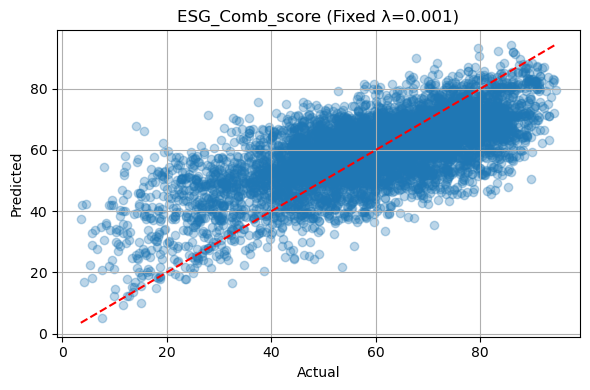

In [51]:
import os
import pickle
import numpy as np
import matplotlib.pyplot as plt
from pygam import LinearGAM, s, f, te

# Define predictors and ESG targets
predictors = ['EPS', 'ROA', 'ROE']
categoricals = ['Country_code', 'Industry_code', 'MCap_code']
esg_targets = ['ESG_score', 'Env_score', 'Soc_score', 'Gov_score', 'ESG_Comb_score']

# Encode categorical variables
df = df.copy()
df['Country_code'] = df['Country of Exchange'].astype('category').cat.codes
df['Industry_code'] = df['NAICS National Industry Name'].astype('category').cat.codes
df['MCap_code'] = df['Market Capitalization Category'].astype('category').cat.codes

# Create directory to store models
model_dir = 'saved_gam_models'
os.makedirs(model_dir, exist_ok=True)

# Penalties
flat_lam = [0.001] * 36  # 36 penalty terms for s(), f(), te()

# Store all models
results = {}

for target in esg_targets:
    print(f"\n=== Fitting GAM with fixed λ=0.001 for: {target} ===")

    # Drop rows with missing values
    df_clean = df.dropna(subset=predictors + [target] + categoricals).copy()
    y = df_clean[target].clip(0.01, 99.99)  # keep within [0.01, 99.99]

    # Prepare features
    X_num = df_clean[predictors].values
    X_cat = df_clean[categoricals].values.astype(int)
    X = np.hstack([X_num, X_cat])

    # Build and fit GAM model
    gam = LinearGAM(
        s(0) + s(1) + s(2) +
        f(3) + f(4) + f(5) +
        te(3, 4) + te(3, 5) + te(4, 5) +
        te(0, 1) + te(0, 2) + te(1, 2) +
        te(0, 3) + te(0, 4) + te(0, 5) +
        te(1, 3) + te(1, 4) + te(1, 5) +
        te(2, 3) + te(2, 4) + te(2, 5),
        lam=flat_lam
    ).fit(X, y)

    results[target] = gam

    # Predict
    y_pred = gam.predict(X)

    # Check prediction range
    min_pred, max_pred = y_pred.min(), y_pred.max()
    if (min_pred < 0) or (max_pred > 100):
        print("⚠️ Warning: Predicted values fall outside expected 0–100 ESG score range.")
    else:
        print("✅ All predicted values are within 0–100 range.")

    # Evaluate
    r2 = gam.statistics_['pseudo_r2']['explained_deviance']
    print(f"✅ Pseudo R² for {target}: {r2:.4f}")
    print(gam.summary())

    # Save model
    model_path = os.path.join(model_dir, f'gam_model_{target}.pkl')
    with open(model_path, 'wb') as model_file:
        pickle.dump(gam, model_file)
    print(f"💾 Model saved to {model_path}")

    # Plot prediction vs actual
    plt.figure(figsize=(6, 4))
    plt.scatter(y, y_pred, alpha=0.3)
    plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
    plt.xlabel("Actual")
    plt.ylabel("Predicted")
    plt.title(f"{target} (Fixed λ=0.001)")
    plt.grid(True)
    plt.tight_layout()
    plt.show()



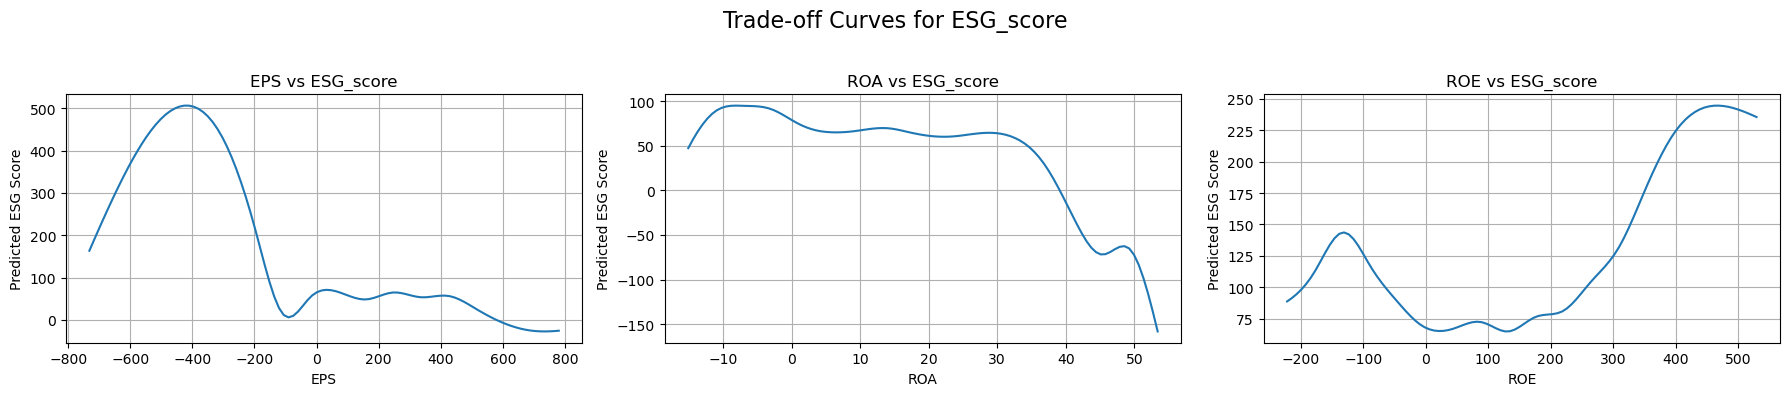

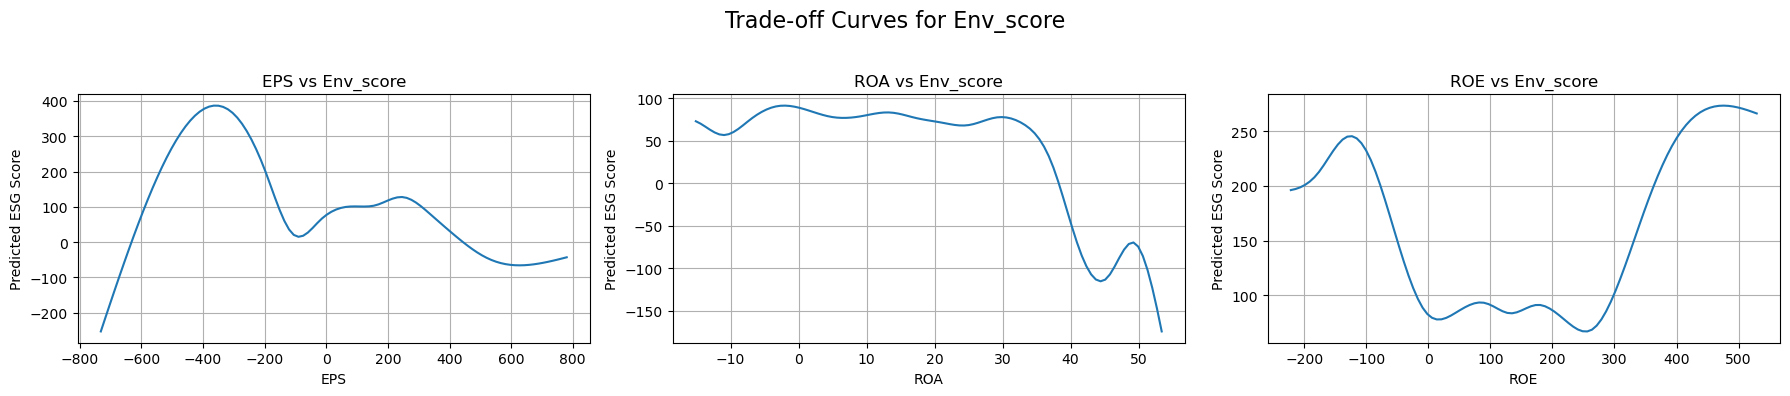

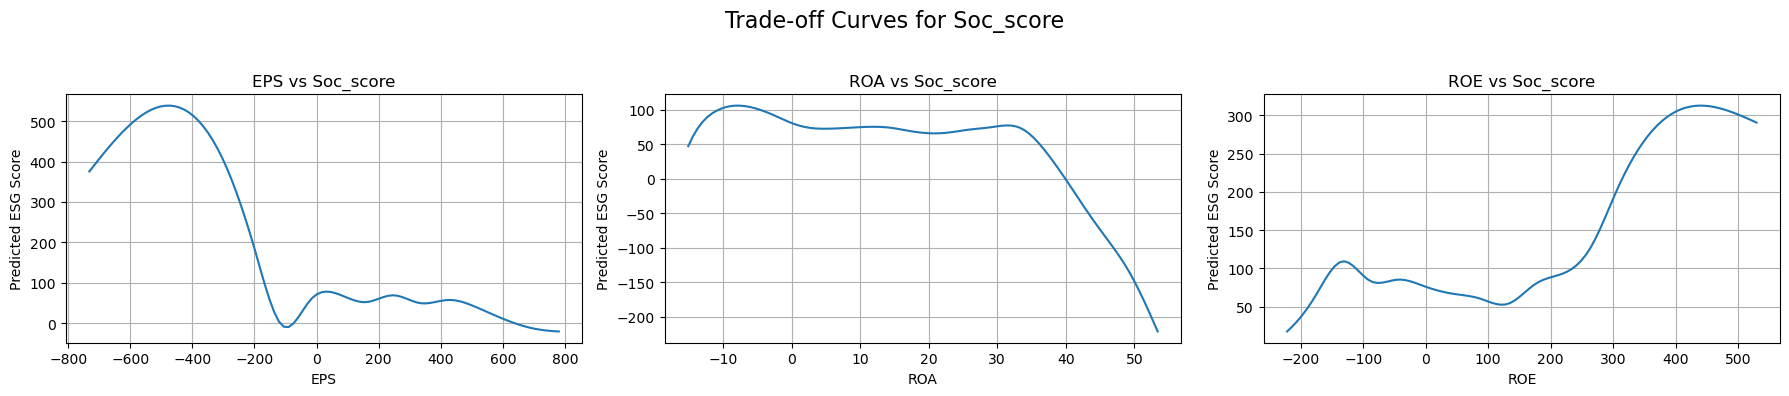

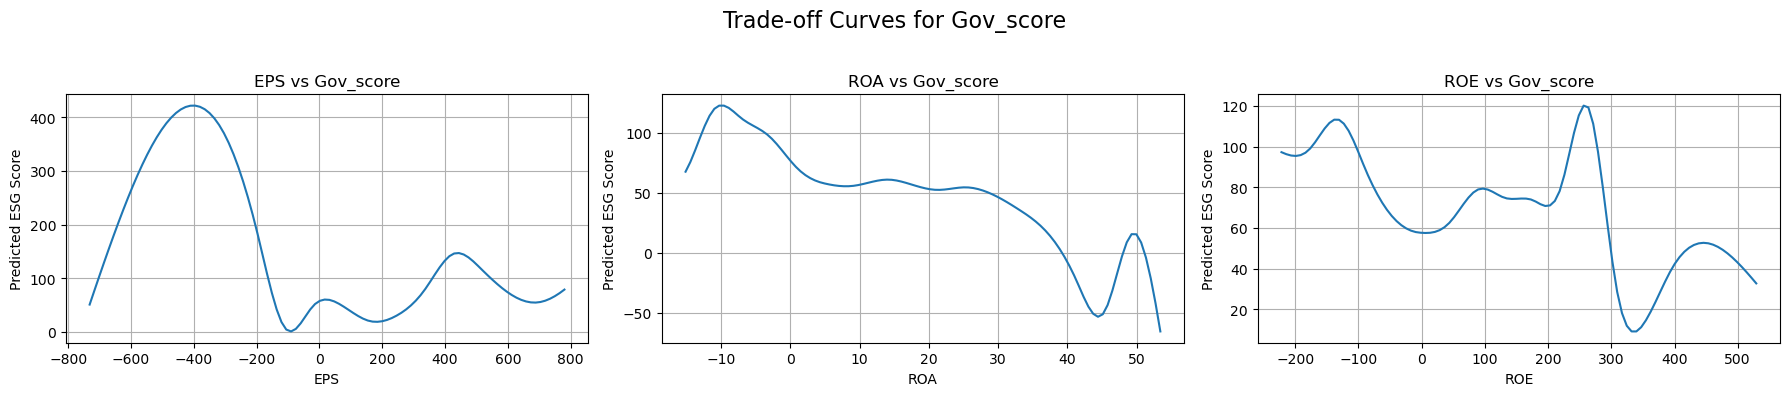

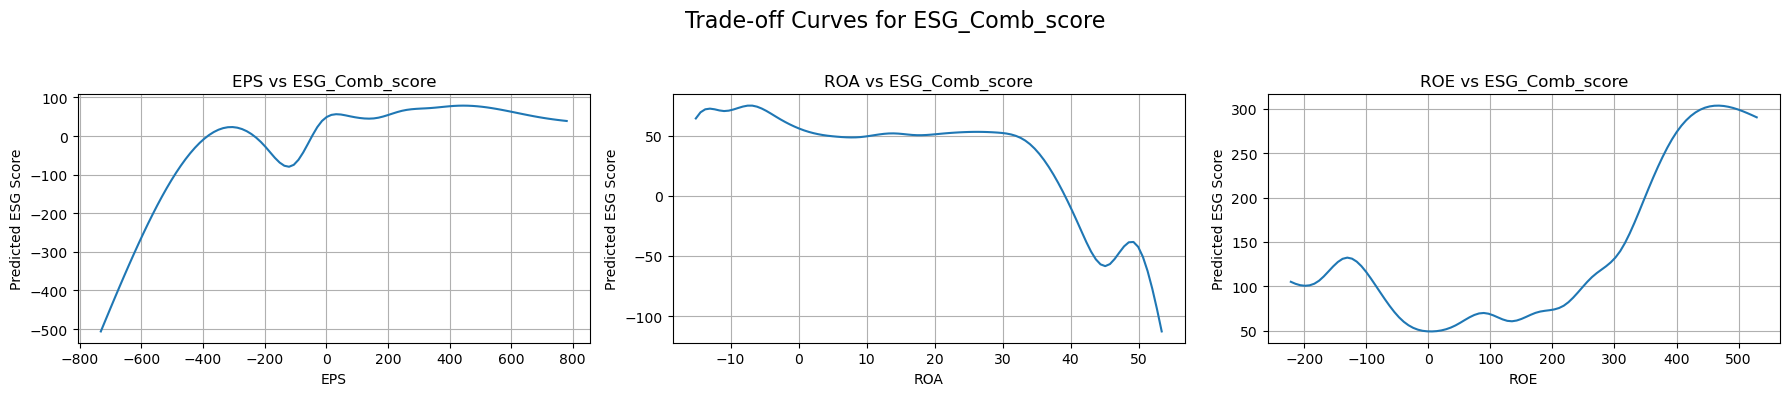

In [55]:
import matplotlib.pyplot as plt
import numpy as np

def plot_1d_tradeoff_curves(results, df, predictors=['EPS', 'ROA', 'ROE'], categoricals=['Country_code', 'Industry_code', 'MCap_code'], esg_targets=None):
    """
    Plot 1D trade-off curves of predicted ESG scores vs each predictor for all ESG targets.

    Args:
        results: dict of {target_name: fitted_gam_model}
        df: original dataframe used for fitting (with encoded categoricals)
        predictors: list of numeric predictor names
        categoricals: list of categorical predictor names
        esg_targets: list of ESG target names to plot; if None, use keys from results
    """
    if esg_targets is None:
        esg_targets = list(results.keys())

    for target in esg_targets:
        gam = results[target]

        # Drop missing rows for predictors + target + categoricals
        df_clean = df.dropna(subset=predictors + [target] + categoricals).copy()

        # Fix categorical vars at mode
        cat_fixed = {cat: int(df_clean[cat].mode()[0]) for cat in categoricals}

        # Fix numeric vars at median (used for predictors not varied)
        medians = {pred: df_clean[pred].median() for pred in predictors}

        plt.figure(figsize=(18, 4))
        plt.suptitle(f'Trade-off Curves for {target}', fontsize=16)

        for i, pred in enumerate(predictors):
            # Generate linspace for varying predictor
            x_vals = np.linspace(df_clean[pred].min(), df_clean[pred].max(), 100)

            # Build prediction matrix
            X_num = []
            for p in predictors:
                if p == pred:
                    X_num.append(x_vals)
                else:
                    X_num.append(np.repeat(medians[p], 100))

            X_num = np.vstack(X_num).T  # shape (100, len(predictors))

            # Categoricals fixed at mode, repeated 100 times
            X_cat = np.vstack([np.repeat(cat_fixed[cat], 100) for cat in categoricals]).T

            # Combine numeric + categorical
            X = np.hstack([X_num, X_cat])

            # Predict ESG
            y_pred = gam.predict(X)

            # Plot
            plt.subplot(1, len(predictors), i + 1)
            plt.plot(x_vals, y_pred, label='Predicted ESG')
            plt.xlabel(pred)
            plt.ylabel('Predicted ESG Score')
            plt.title(f'{pred} vs {target}')
            plt.grid(True)

        plt.tight_layout(rect=[0, 0, 1, 0.95])
        plt.show()


# Example usage after your fitting loop:
plot_1d_tradeoff_curves(results, df)


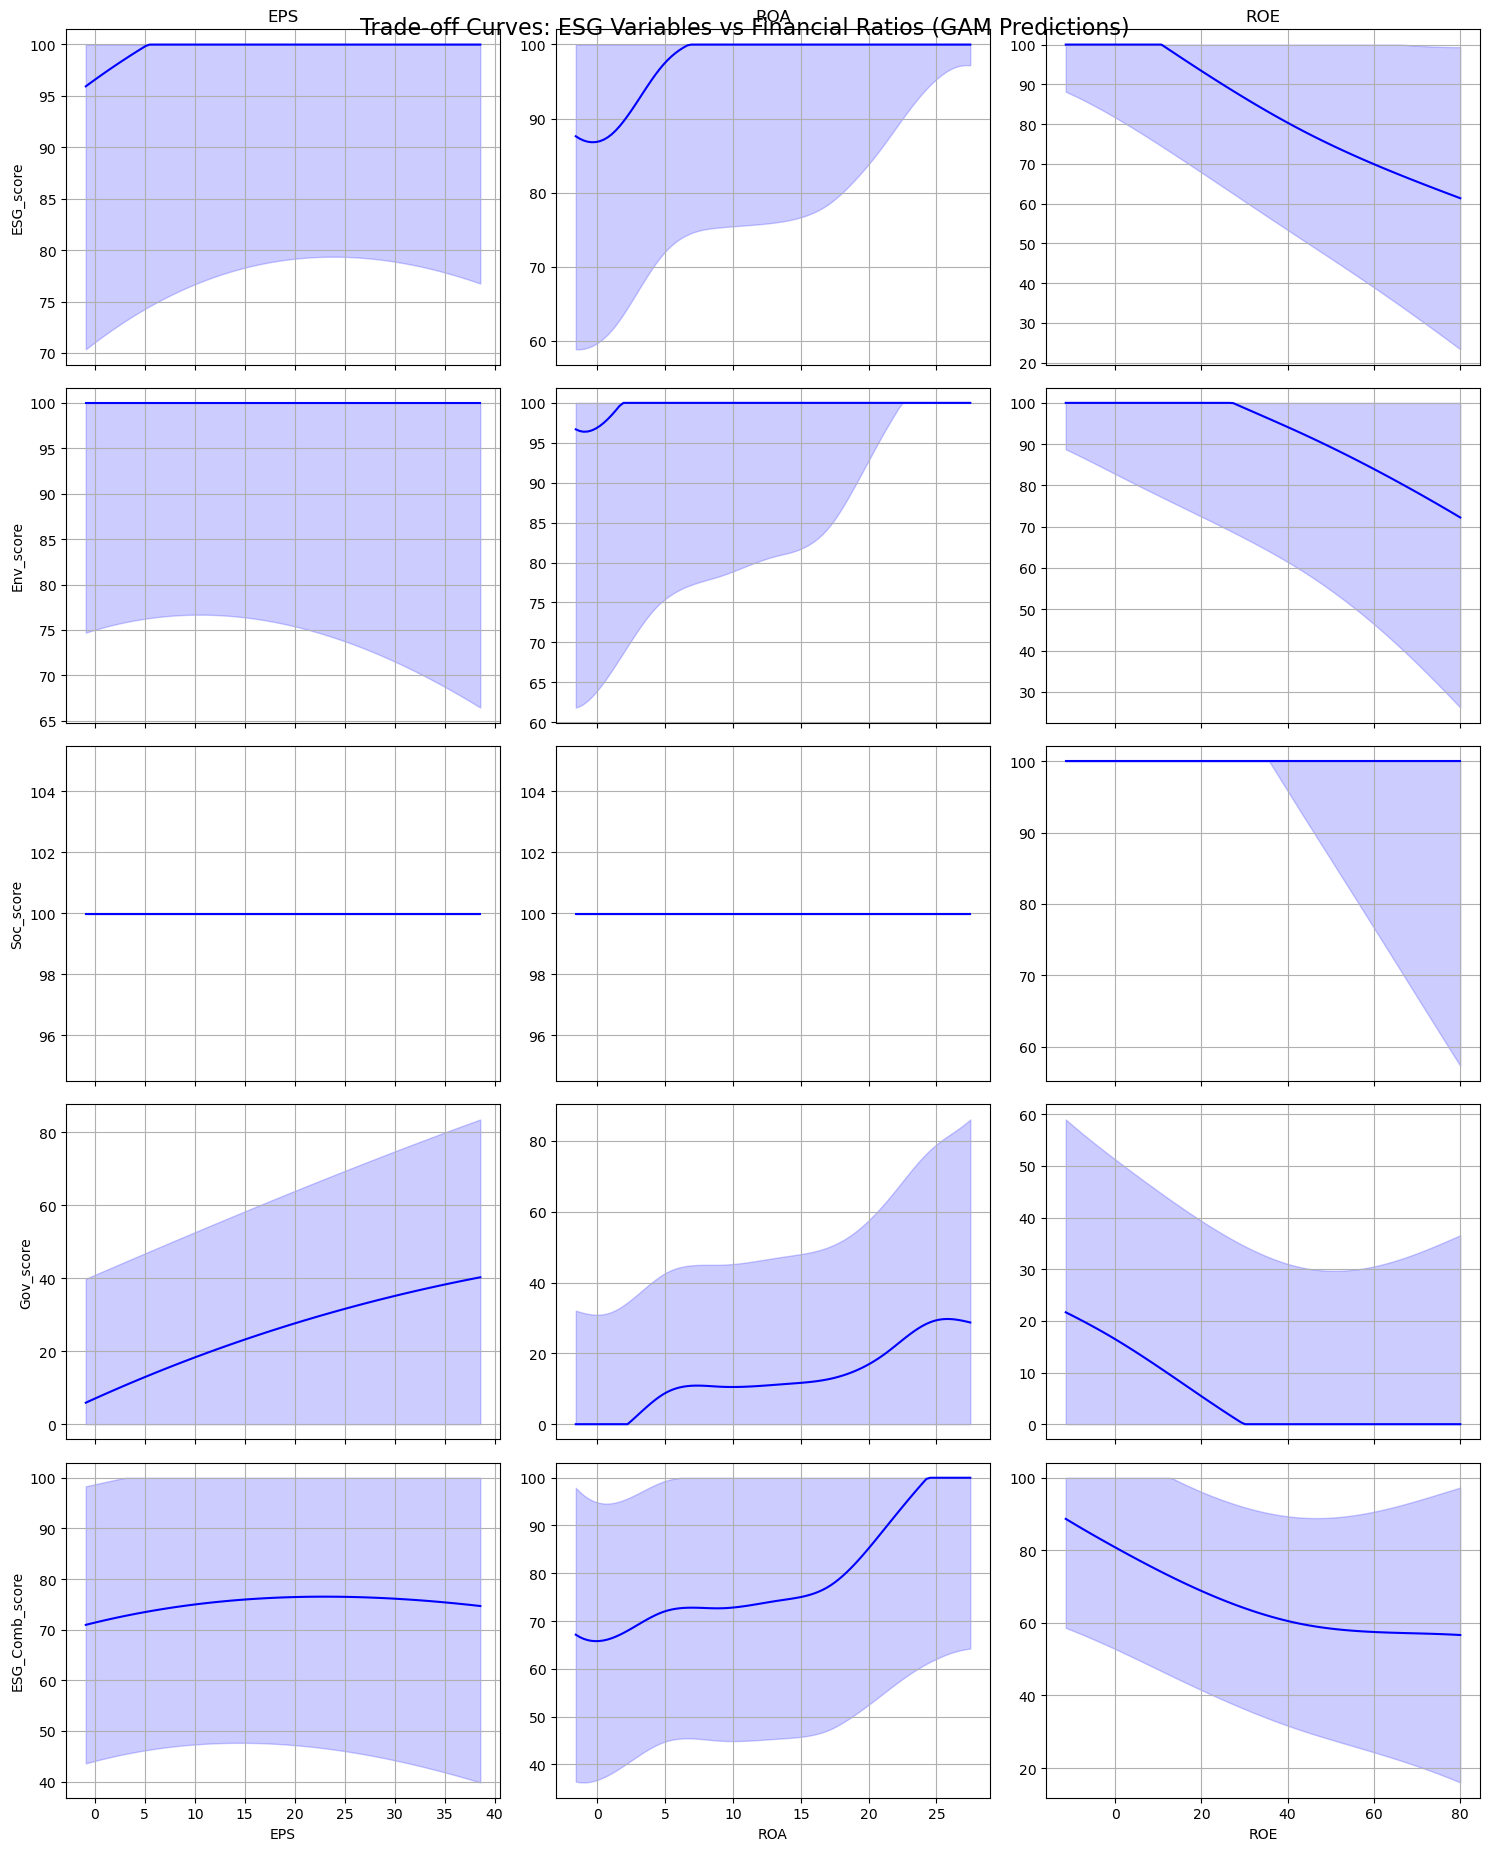

In [53]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
import os

# Define predictors and ESG targets
predictors = ['EPS', 'ROA', 'ROE']
categoricals = ['Country_code', 'Industry_code', 'MCap_code']
esg_targets = ['ESG_score', 'Env_score', 'Soc_score', 'Gov_score', 'ESG_Comb_score']

# Directory where models are saved
model_dir = 'saved_gam_models'

# Prepare figure grid: 5 ESG targets x 3 financial ratios
fig, axes = plt.subplots(nrows=len(esg_targets), ncols=len(predictors), figsize=(15, 20), sharex='col')
fig.suptitle('Trade-off Curves: ESG Variables vs Financial Ratios (GAM Predictions)', fontsize=16, y=0.92)

# Loop over ESG targets (rows)
for row_idx, target in enumerate(esg_targets):
    # Load the GAM model for the current ESG target
    model_path = os.path.join(model_dir, f'gam_model_{target}.pkl')
    with open(model_path, 'rb') as f:
        gam = pickle.load(f)

    # Clean data: must have predictors, target, and categorical codes
    df_clean = df.dropna(subset=predictors + [target] + categoricals).copy()

    # Prepare feature matrix consistent with GAM input
    X_num = df_clean[predictors].values
    X_cat = df_clean[categoricals].values.astype(int)
    X_train = np.hstack([X_num, X_cat])

    # Feature index mapping
    feature_names = predictors + categoricals
    feature_indices = {name: idx for idx, name in enumerate(feature_names)}

    # Baseline: median of all features
    X_baseline = np.median(X_train, axis=0)

    # Loop over financial ratios (columns)
    for col_idx, fin_ratio in enumerate(predictors):
        idx_fin = feature_indices[fin_ratio]

        # Define grid for financial ratio: between 1st and 99th percentile to avoid outliers
        fin_min, fin_max = np.quantile(X_train[:, idx_fin], [0.01, 0.99])
        fin_grid = np.linspace(fin_min, fin_max, 100)

        # Create prediction input matrix by varying one financial ratio, fix others at median
        X_pred = np.tile(X_baseline, (100, 1))
        X_pred[:, idx_fin] = fin_grid

        # Predict ESG score, clip to [0.01, 99.99]
        esg_pred = np.clip(gam.predict(X_pred), 0.01, 99.99)

        # Predict confidence intervals and clip as well
        conf_int = gam.confidence_intervals(X_pred)
        conf_int = np.clip(conf_int, 0.01, 99.99)

        # Plot results
        ax = axes[row_idx, col_idx]
        ax.plot(fin_grid, esg_pred, label=target, color='blue')
        ax.fill_between(fin_grid, conf_int[:, 0], conf_int[:, 1], color='blue', alpha=0.2)

        # Titles and labels
        if row_idx == 0:
            ax.set_title(f'{fin_ratio}')
        if col_idx == 0:
            ax.set_ylabel(target)
        if row_idx == len(esg_targets) - 1:
            ax.set_xlabel(fin_ratio)
        ax.grid(True)

# Adjust layout to prevent overlap and show figure
plt.tight_layout(rect=[0, 0, 1, 0.95])  # leave space for suptitle
plt.show()


## Logit

In [31]:
from pygam import GAM, s, f, te
from pygam.distributions import BinomialDist
from pygam.links import LogitLink
import numpy as np
import matplotlib.pyplot as plt

# Define predictors and ESG targets
predictors = ['EPS', 'ROA', 'ROE']
categoricals = ['Country_code', 'Industry_code', 'MCap_code']
esg_targets = ['ESG_score', 'Env_score', 'Soc_score', 'Gov_score', 'ESG_Comb_score']

# Make sure categorical codes are present
df = df.copy()
df['Country_code'] = df['Country of Exchange'].astype('category').cat.codes
df['Industry_code'] = df['NAICS National Industry Name'].astype('category').cat.codes
df['MCap_code'] = df['Market Capitalization Category'].astype('category').cat.codes

results = {}
optimal_penalties = {}

for target in esg_targets:
    # Drop missing data
    df_clean = df.dropna(subset=predictors + [target] + categoricals).copy()

    # Transform target to (0,1) range for Binomial GAM with logit link
    y_raw = df_clean[target].clip(0.01, 99.99)  # avoid exact 0 or 100
    y_trans = y_raw / 100.0

    # Prepare features matrix
    X_num = df_clean[predictors].values
    X_cat = df_clean[categoricals].values.astype(int)
    X = np.hstack([X_num, X_cat])
    y = y_trans

    # Build the GAM model without fixed lam to gridsearch penalties
    gam = GAM(
        s(0) + s(1) + s(2) +          # Numeric splines
        f(3) + f(4) + f(5) +          # Categorical factors
        te(3, 4) + te(3, 5) + te(4, 5) +  # Cat x Cat interactions
        te(0, 1) + te(0, 2) + te(1, 2) +  # Num x Num interactions
        te(0, 3) + te(0, 4) + te(0, 5) +  # Num x Cat interactions
        te(1, 3) + te(1, 4) + te(1, 5) +
        te(2, 3) + te(2, 4) + te(2, 5),
        link=LogitLink(),
        distribution=BinomialDist(),
        verbose=False
    )

    # Run gridsearch to find optimal penalty vector lam for all terms
    gam.gridsearch(X, y)

    results[target] = gam
    optimal_penalties[target] = gam.lam

    print(f"\nTarget: {target}")
    print(f"Optimal penalties: {gam.lam}")

    # # Optionally, show summary and histogram of predictions
    # gam.summary()
    # y_pred_pct = gam.predict(X) * 100
    # plt.hist(y_pred_pct, bins=30)
    # plt.title(f'Predicted {target} (0-100 scale)')
    # plt.xlabel(target)
    # plt.ylabel('Count')
    # plt.show()


  0% (0 of 11) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--C:\Users\fbergsma1\AppData\Local\anaconda3\Lib\site-packages\pygam\pygam.py:1151: RuntimeWarning: invalid value encountered in scalar divide
  r2['McFadden'] = full_ll / null_ll
C:\Users\fbergsma1\AppData\Local\anaconda3\Lib\site-packages\pygam\pygam.py:1152: RuntimeWarning: invalid value encountered in scalar divide
  r2['McFadden_adj'] = 1.0 - (full_ll - self.statistics_['edof']) / null_ll
  9% (1 of 11) |##                       | Elapsed Time: 0:00:15 ETA:   0:02:30C:\Users\fbergsma1\AppData\Local\anaconda3\Lib\site-packages\pygam\pygam.py:1151: RuntimeWarning: invalid value encountered in scalar divide
  r2['McFadden'] = full_ll / null_ll
C:\Users\fbergsma1\AppData\Local\anaconda3\Lib\site-packages\pygam\pygam.py:1152: RuntimeWarning: invalid value encountered in scalar divide
  r2['McFadden_adj'] = 1.0 - (full_ll - self.statistics_['edof']) / null_ll
 18% (2 of 11) |####                     | Elapsed T


Target: ESG_score
Optimal penalties: [[1000.0], [1000.0], [1000.0], [1000.0], [1000.0], [1000.0], [[1000.0], [1000.0]], [[1000.0], [1000.0]], [[1000.0], [1000.0]], [[1000.0], [1000.0]], [[1000.0], [1000.0]], [[1000.0], [1000.0]], [[1000.0], [1000.0]], [[1000.0], [1000.0]], [[1000.0], [1000.0]], [[1000.0], [1000.0]], [[1000.0], [1000.0]], [[1000.0], [1000.0]], [[1000.0], [1000.0]], [[1000.0], [1000.0]], [[1000.0], [1000.0]]]


C:\Users\fbergsma1\AppData\Local\anaconda3\Lib\site-packages\pygam\pygam.py:1151: RuntimeWarning: invalid value encountered in scalar divide
  r2['McFadden'] = full_ll / null_ll
C:\Users\fbergsma1\AppData\Local\anaconda3\Lib\site-packages\pygam\pygam.py:1152: RuntimeWarning: invalid value encountered in scalar divide
  r2['McFadden_adj'] = 1.0 - (full_ll - self.statistics_['edof']) / null_ll
  9% (1 of 11) |##                       | Elapsed Time: 0:00:28 ETA:   0:04:49C:\Users\fbergsma1\AppData\Local\anaconda3\Lib\site-packages\pygam\pygam.py:1151: RuntimeWarning: invalid value encountered in scalar divide
  r2['McFadden'] = full_ll / null_ll
C:\Users\fbergsma1\AppData\Local\anaconda3\Lib\site-packages\pygam\pygam.py:1152: RuntimeWarning: invalid value encountered in scalar divide
  r2['McFadden_adj'] = 1.0 - (full_ll - self.statistics_['edof']) / null_ll
 18% (2 of 11) |####                     | Elapsed Time: 0:00:41 ETA:   0:03:08C:\Users\fbergsma1\AppData\Local\anaconda3\Lib\site-


Target: Env_score
Optimal penalties: [[15.848931924611142], [15.848931924611142], [15.848931924611142], [15.848931924611142], [15.848931924611142], [15.848931924611142], [[15.848931924611142], [15.848931924611142]], [[15.848931924611142], [15.848931924611142]], [[15.848931924611142], [15.848931924611142]], [[15.848931924611142], [15.848931924611142]], [[15.848931924611142], [15.848931924611142]], [[15.848931924611142], [15.848931924611142]], [[15.848931924611142], [15.848931924611142]], [[15.848931924611142], [15.848931924611142]], [[15.848931924611142], [15.848931924611142]], [[15.848931924611142], [15.848931924611142]], [[15.848931924611142], [15.848931924611142]], [[15.848931924611142], [15.848931924611142]], [[15.848931924611142], [15.848931924611142]], [[15.848931924611142], [15.848931924611142]], [[15.848931924611142], [15.848931924611142]]]


C:\Users\fbergsma1\AppData\Local\anaconda3\Lib\site-packages\pygam\pygam.py:1151: RuntimeWarning: invalid value encountered in scalar divide
  r2['McFadden'] = full_ll / null_ll
C:\Users\fbergsma1\AppData\Local\anaconda3\Lib\site-packages\pygam\pygam.py:1152: RuntimeWarning: invalid value encountered in scalar divide
  r2['McFadden_adj'] = 1.0 - (full_ll - self.statistics_['edof']) / null_ll
  9% (1 of 11) |##                       | Elapsed Time: 0:00:17 ETA:   0:02:55C:\Users\fbergsma1\AppData\Local\anaconda3\Lib\site-packages\pygam\pygam.py:1151: RuntimeWarning: invalid value encountered in scalar divide
  r2['McFadden'] = full_ll / null_ll
C:\Users\fbergsma1\AppData\Local\anaconda3\Lib\site-packages\pygam\pygam.py:1152: RuntimeWarning: invalid value encountered in scalar divide
  r2['McFadden_adj'] = 1.0 - (full_ll - self.statistics_['edof']) / null_ll
 18% (2 of 11) |####                     | Elapsed Time: 0:00:27 ETA:   0:02:04C:\Users\fbergsma1\AppData\Local\anaconda3\Lib\site-


Target: Soc_score
Optimal penalties: [[63.0957344480193], [63.0957344480193], [63.0957344480193], [63.0957344480193], [63.0957344480193], [63.0957344480193], [[63.0957344480193], [63.0957344480193]], [[63.0957344480193], [63.0957344480193]], [[63.0957344480193], [63.0957344480193]], [[63.0957344480193], [63.0957344480193]], [[63.0957344480193], [63.0957344480193]], [[63.0957344480193], [63.0957344480193]], [[63.0957344480193], [63.0957344480193]], [[63.0957344480193], [63.0957344480193]], [[63.0957344480193], [63.0957344480193]], [[63.0957344480193], [63.0957344480193]], [[63.0957344480193], [63.0957344480193]], [[63.0957344480193], [63.0957344480193]], [[63.0957344480193], [63.0957344480193]], [[63.0957344480193], [63.0957344480193]], [[63.0957344480193], [63.0957344480193]]]


C:\Users\fbergsma1\AppData\Local\anaconda3\Lib\site-packages\pygam\pygam.py:1151: RuntimeWarning: invalid value encountered in scalar divide
  r2['McFadden'] = full_ll / null_ll
C:\Users\fbergsma1\AppData\Local\anaconda3\Lib\site-packages\pygam\pygam.py:1152: RuntimeWarning: invalid value encountered in scalar divide
  r2['McFadden_adj'] = 1.0 - (full_ll - self.statistics_['edof']) / null_ll
  9% (1 of 11) |##                       | Elapsed Time: 0:00:13 ETA:   0:02:18C:\Users\fbergsma1\AppData\Local\anaconda3\Lib\site-packages\pygam\pygam.py:1151: RuntimeWarning: invalid value encountered in scalar divide
  r2['McFadden'] = full_ll / null_ll
C:\Users\fbergsma1\AppData\Local\anaconda3\Lib\site-packages\pygam\pygam.py:1152: RuntimeWarning: invalid value encountered in scalar divide
  r2['McFadden_adj'] = 1.0 - (full_ll - self.statistics_['edof']) / null_ll
 18% (2 of 11) |####                     | Elapsed Time: 0:00:23 ETA:   0:01:46C:\Users\fbergsma1\AppData\Local\anaconda3\Lib\site-


Target: Gov_score
Optimal penalties: [[1000.0], [1000.0], [1000.0], [1000.0], [1000.0], [1000.0], [[1000.0], [1000.0]], [[1000.0], [1000.0]], [[1000.0], [1000.0]], [[1000.0], [1000.0]], [[1000.0], [1000.0]], [[1000.0], [1000.0]], [[1000.0], [1000.0]], [[1000.0], [1000.0]], [[1000.0], [1000.0]], [[1000.0], [1000.0]], [[1000.0], [1000.0]], [[1000.0], [1000.0]], [[1000.0], [1000.0]], [[1000.0], [1000.0]], [[1000.0], [1000.0]]]


C:\Users\fbergsma1\AppData\Local\anaconda3\Lib\site-packages\pygam\pygam.py:1151: RuntimeWarning: invalid value encountered in scalar divide
  r2['McFadden'] = full_ll / null_ll
C:\Users\fbergsma1\AppData\Local\anaconda3\Lib\site-packages\pygam\pygam.py:1152: RuntimeWarning: invalid value encountered in scalar divide
  r2['McFadden_adj'] = 1.0 - (full_ll - self.statistics_['edof']) / null_ll
  9% (1 of 11) |##                       | Elapsed Time: 0:00:14 ETA:   0:02:26C:\Users\fbergsma1\AppData\Local\anaconda3\Lib\site-packages\pygam\pygam.py:1151: RuntimeWarning: invalid value encountered in scalar divide
  r2['McFadden'] = full_ll / null_ll
C:\Users\fbergsma1\AppData\Local\anaconda3\Lib\site-packages\pygam\pygam.py:1152: RuntimeWarning: invalid value encountered in scalar divide
  r2['McFadden_adj'] = 1.0 - (full_ll - self.statistics_['edof']) / null_ll
 18% (2 of 11) |####                     | Elapsed Time: 0:00:25 ETA:   0:01:53C:\Users\fbergsma1\AppData\Local\anaconda3\Lib\site-


Target: ESG_Comb_score
Optimal penalties: [[1000.0], [1000.0], [1000.0], [1000.0], [1000.0], [1000.0], [[1000.0], [1000.0]], [[1000.0], [1000.0]], [[1000.0], [1000.0]], [[1000.0], [1000.0]], [[1000.0], [1000.0]], [[1000.0], [1000.0]], [[1000.0], [1000.0]], [[1000.0], [1000.0]], [[1000.0], [1000.0]], [[1000.0], [1000.0]], [[1000.0], [1000.0]], [[1000.0], [1000.0]], [[1000.0], [1000.0]], [[1000.0], [1000.0]], [[1000.0], [1000.0]]]


In [35]:
from pygam import GAM, s, f, te
from pygam.distributions import BinomialDist
from pygam.links import LogitLink
import numpy as np
import matplotlib.pyplot as plt  # You need this for plotting histograms

# Define predictors and ESG targets
predictors = ['EPS', 'ROA', 'ROE']
esg_targets = ['ESG_score', 'Env_score', 'Soc_score', 'Gov_score', 'ESG_Comb_score']

# Prepare DataFrame: categorical codes
df = df.copy()
df['Country of Exchange'] = df['Country of Exchange'].astype('category')
df['NAICS National Industry Name'] = df['NAICS National Industry Name'].astype('category')
df['Market Capitalization Category'] = df['Market Capitalization Category'].astype('category')

df['Country_code'] = df['Country of Exchange'].cat.codes
df['Industry_code'] = df['NAICS National Industry Name'].cat.codes
df['MCap_code'] = df['Market Capitalization Category'].cat.codes

# Optimal penalties dictionary keyed by target name
optimal_lams_dict = {
    'ESG_score': [
        [1000.0], [1000.0], [1000.0],
        [1000.0], [1000.0], [1000.0],
        [1000.0, 1000.0], [1000.0, 1000.0], [1000.0, 1000.0],
        [1000.0, 1000.0], [1000.0, 1000.0], [1000.0, 1000.0],
        [1000.0, 1000.0], [1000.0, 1000.0], [1000.0, 1000.0],
        [1000.0, 1000.0], [1000.0, 1000.0], [1000.0, 1000.0],
        [1000.0, 1000.0], [1000.0, 1000.0], [1000.0, 1000.0]
    ],
    'Env_score': [
        [15.8489], [15.8489], [15.8489],
        [15.8489], [15.8489], [15.8489],
        [15.8489, 15.8489], [15.8489, 15.8489], [15.8489, 15.8489],
        [15.8489, 15.8489], [15.8489, 15.8489], [15.8489, 15.8489],
        [15.8489, 15.8489], [15.8489, 15.8489], [15.8489, 15.8489],
        [15.8489, 15.8489], [15.8489, 15.8489], [15.8489, 15.8489],
        [15.8489, 15.8489], [15.8489, 15.8489], [15.8489, 15.8489]
    ],
    'Soc_score': [
        [63.0957], [63.0957], [63.0957],
        [63.0957], [63.0957], [63.0957],
        [63.0957, 63.0957], [63.0957, 63.0957], [63.0957, 63.0957],
        [63.0957, 63.0957], [63.0957, 63.0957], [63.0957, 63.0957],
        [63.0957, 63.0957], [63.0957, 63.0957], [63.0957, 63.0957],
        [63.0957, 63.0957], [63.0957, 63.0957], [63.0957, 63.0957],
        [63.0957, 63.0957], [63.0957, 63.0957], [63.0957, 63.0957]
    ],
    'Gov_score': [
        [1000.0], [1000.0], [1000.0],
        [1000.0], [1000.0], [1000.0],
        [1000.0, 1000.0], [1000.0, 1000.0], [1000.0, 1000.0],
        [1000.0, 1000.0], [1000.0, 1000.0], [1000.0, 1000.0],
        [1000.0, 1000.0], [1000.0, 1000.0], [1000.0, 1000.0],
        [1000.0, 1000.0], [1000.0, 1000.0], [1000.0, 1000.0],
        [1000.0, 1000.0], [1000.0, 1000.0], [1000.0, 1000.0]
    ],
    'ESG_Comb_score': [
        [1000.0], [1000.0], [1000.0],
        [1000.0], [1000.0], [1000.0],
        [1000.0, 1000.0], [1000.0, 1000.0], [1000.0, 1000.0],
        [1000.0, 1000.0], [1000.0, 1000.0], [1000.0, 1000.0],
        [1000.0, 1000.0], [1000.0, 1000.0], [1000.0, 1000.0],
        [1000.0, 1000.0], [1000.0, 1000.0], [1000.0, 1000.0],
        [1000.0, 1000.0], [1000.0, 1000.0], [1000.0, 1000.0]
    ],
}

for target in esg_targets:
    df_clean = df.dropna(subset=predictors + [target, 'Country_code', 'Industry_code', 'MCap_code']).copy()

    y_raw = df_clean[target].clip(0.01, 99.99)
    y_trans = y_raw / 100.0

    X_num = df_clean[predictors].values
    X_cat = df_clean[['Country_code', 'Industry_code', 'MCap_code']].values
    X = np.hstack([X_num, X_cat])

    lam_vals = optimal_lams_dict[target]

    gam = GAM(
        s(0, lam=lam_vals[0][0]) + s(1, lam=lam_vals[1][0]) + s(2, lam=lam_vals[2][0]) +
        f(3, lam=lam_vals[3][0]) + f(4, lam=lam_vals[4][0]) + f(5, lam=lam_vals[5][0]) +
        te(3, 4, lam=lam_vals[6]) + te(3, 5, lam=lam_vals[7]) + te(4, 5, lam=lam_vals[8]) +
        te(0, 1, lam=lam_vals[9]) + te(0, 2, lam=lam_vals[10]) + te(1, 2, lam=lam_vals[11]) +
        te(0, 3, lam=lam_vals[12]) + te(0, 4, lam=lam_vals[13]) + te(0, 5, lam=lam_vals[14]) +
        te(1, 3, lam=lam_vals[15]) + te(1, 4, lam=lam_vals[16]),
        link=LogitLink(),
        distribution=BinomialDist()
    ).fit(X, y_trans)

    # Predict scaled back to 0-100 scale
    y_pred_pct = gam.predict(X) * 100

    # Print summary
    print(f"\nGAM Summary for Target: {target}")
    gam.summary()


C:\Users\fbergsma1\AppData\Local\anaconda3\Lib\site-packages\pygam\pygam.py:1151: RuntimeWarning: invalid value encountered in scalar divide
  r2['McFadden'] = full_ll / null_ll
C:\Users\fbergsma1\AppData\Local\anaconda3\Lib\site-packages\pygam\pygam.py:1152: RuntimeWarning: invalid value encountered in scalar divide
  r2['McFadden_adj'] = 1.0 - (full_ll - self.statistics_['edof']) / null_ll



GAM Summary for Target: ESG_score
GAM                                                                                                       
=============================================== ==========================================================
Distribution:                      BinomialDist Effective DoF:                                     22.2608
Link Function:                        LogitLink Log Likelihood:                                       -inf
Number of Samples:                         6296 AIC:                                                   inf
                                                AICc:                                                  inf
                                                UBRE:                                               2.1267
                                                Scale:                                                 1.0
                                                Pseudo R-Squared:                                   0.2275
Fe

C:\Users\fbergsma1\AppData\Local\Temp\ipykernel_24892\3600450421.py:98: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

  gam.summary()
C:\Users\fbergsma1\AppData\Local\anaconda3\Lib\site-packages\pygam\pygam.py:1151: RuntimeWarning: invalid value encountered in scalar divide
  r2['McFadden'] = full_ll / null_ll
C:\Users\fbergsma1\AppData\Local\anaconda3\Lib\site-packages\pygam\pygam.py:1152: RuntimeWarning: invalid value encountered in scalar divide
  r2['McFadden_adj'] = 1.0 - (full_ll - self.statistics_['edof']) / null_ll



GAM Summary for Target: Env_score
GAM                                                                                                       
=============================================== ==========================================================
Distribution:                      BinomialDist Effective DoF:                                     92.0951
Link Function:                        LogitLink Log Likelihood:                                       -inf
Number of Samples:                         6296 AIC:                                                   inf
                                                AICc:                                                  inf
                                                UBRE:                                               2.2006
                                                Scale:                                                 1.0
                                                Pseudo R-Squared:                                   0.4149
Fe

C:\Users\fbergsma1\AppData\Local\Temp\ipykernel_24892\3600450421.py:98: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

  gam.summary()
C:\Users\fbergsma1\AppData\Local\anaconda3\Lib\site-packages\pygam\pygam.py:1151: RuntimeWarning: invalid value encountered in scalar divide
  r2['McFadden'] = full_ll / null_ll
C:\Users\fbergsma1\AppData\Local\anaconda3\Lib\site-packages\pygam\pygam.py:1152: RuntimeWarning: invalid value encountered in scalar divide
  r2['McFadden_adj'] = 1.0 - (full_ll - self.statistics_['edof']) / null_ll



GAM Summary for Target: Soc_score
GAM                                                                                                       
=============================================== ==========================================================
Distribution:                      BinomialDist Effective DoF:                                      50.359
Link Function:                        LogitLink Log Likelihood:                                       -inf
Number of Samples:                         6296 AIC:                                                   inf
                                                AICc:                                                  inf
                                                UBRE:                                               2.1736
                                                Scale:                                                 1.0
                                                Pseudo R-Squared:                                   0.2892
Fe

C:\Users\fbergsma1\AppData\Local\Temp\ipykernel_24892\3600450421.py:98: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

  gam.summary()
C:\Users\fbergsma1\AppData\Local\anaconda3\Lib\site-packages\pygam\pygam.py:1151: RuntimeWarning: invalid value encountered in scalar divide
  r2['McFadden'] = full_ll / null_ll
C:\Users\fbergsma1\AppData\Local\anaconda3\Lib\site-packages\pygam\pygam.py:1152: RuntimeWarning: invalid value encountered in scalar divide
  r2['McFadden_adj'] = 1.0 - (full_ll - self.statistics_['edof']) / null_ll



GAM Summary for Target: Gov_score
GAM                                                                                                       
=============================================== ==========================================================
Distribution:                      BinomialDist Effective DoF:                                      22.416
Link Function:                        LogitLink Log Likelihood:                                       -inf
Number of Samples:                         6296 AIC:                                                   inf
                                                AICc:                                                  inf
                                                UBRE:                                               2.1957
                                                Scale:                                                 1.0
                                                Pseudo R-Squared:                                   0.1051
Fe

C:\Users\fbergsma1\AppData\Local\Temp\ipykernel_24892\3600450421.py:98: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

  gam.summary()
C:\Users\fbergsma1\AppData\Local\anaconda3\Lib\site-packages\pygam\pygam.py:1151: RuntimeWarning: invalid value encountered in scalar divide
  r2['McFadden'] = full_ll / null_ll
C:\Users\fbergsma1\AppData\Local\anaconda3\Lib\site-packages\pygam\pygam.py:1152: RuntimeWarning: invalid value encountered in scalar divide
  r2['McFadden_adj'] = 1.0 - (full_ll - self.statistics_['edof']) / null_ll



GAM Summary for Target: ESG_Comb_score
GAM                                                                                                       
=============================================== ==========================================================
Distribution:                      BinomialDist Effective DoF:                                      22.472
Link Function:                        LogitLink Log Likelihood:                                       -inf
Number of Samples:                         6296 AIC:                                                   inf
                                                AICc:                                                  inf
                                                UBRE:                                               2.1259
                                                Scale:                                                 1.0
                                                Pseudo R-Squared:                                   0.11

C:\Users\fbergsma1\AppData\Local\Temp\ipykernel_24892\3600450421.py:98: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

  gam.summary()


C:\Users\fbergsma1\AppData\Local\anaconda3\Lib\site-packages\pygam\pygam.py:1151: RuntimeWarning: invalid value encountered in scalar divide
  r2['McFadden'] = full_ll / null_ll
C:\Users\fbergsma1\AppData\Local\anaconda3\Lib\site-packages\pygam\pygam.py:1152: RuntimeWarning: invalid value encountered in scalar divide
  r2['McFadden_adj'] = 1.0 - (full_ll - self.statistics_['edof']) / null_ll



GAM Summary for Target: ESG_score
GAM                                                                                                       
=============================================== ==========================================================
Distribution:                      BinomialDist Effective DoF:                                     26.4507
Link Function:                        LogitLink Log Likelihood:                                       -inf
Number of Samples:                         6296 AIC:                                                   inf
                                                AICc:                                                  inf
                                                UBRE:                                               2.1278
                                                Scale:                                                 1.0
                                                Pseudo R-Squared:                                    0.233
Fe

C:\Users\fbergsma1\AppData\Local\Temp\ipykernel_24892\1254969062.py:64: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

  gam.summary()


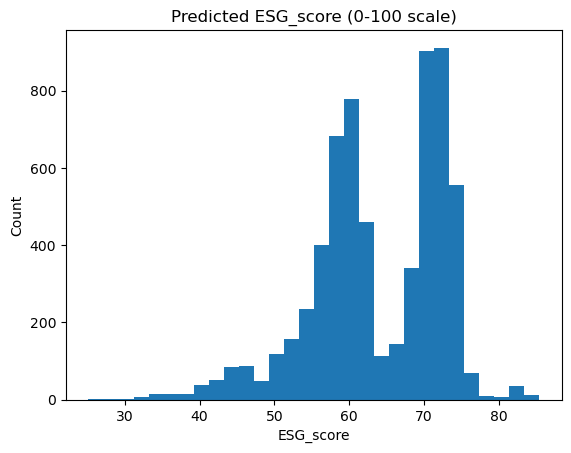

C:\Users\fbergsma1\AppData\Local\anaconda3\Lib\site-packages\pygam\pygam.py:1151: RuntimeWarning: invalid value encountered in scalar divide
  r2['McFadden'] = full_ll / null_ll
C:\Users\fbergsma1\AppData\Local\anaconda3\Lib\site-packages\pygam\pygam.py:1152: RuntimeWarning: invalid value encountered in scalar divide
  r2['McFadden_adj'] = 1.0 - (full_ll - self.statistics_['edof']) / null_ll



GAM Summary for Target: Env_score
GAM                                                                                                       
=============================================== ==========================================================
Distribution:                      BinomialDist Effective DoF:                                     96.5286
Link Function:                        LogitLink Log Likelihood:                                       -inf
Number of Samples:                         6296 AIC:                                                   inf
                                                AICc:                                                  inf
                                                UBRE:                                               2.2018
                                                Scale:                                                 1.0
                                                Pseudo R-Squared:                                   0.4177
Fe

C:\Users\fbergsma1\AppData\Local\Temp\ipykernel_24892\1254969062.py:64: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

  gam.summary()


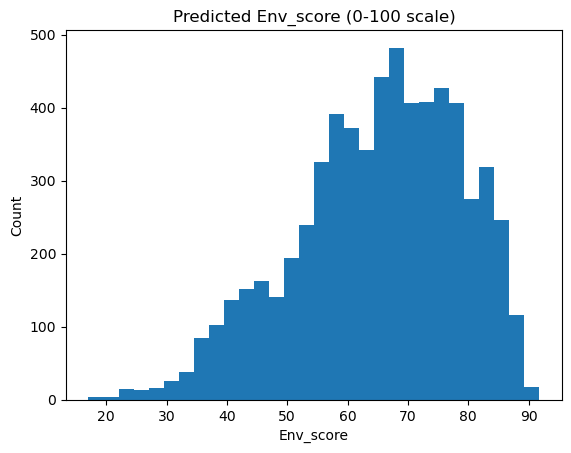

C:\Users\fbergsma1\AppData\Local\anaconda3\Lib\site-packages\pygam\pygam.py:1151: RuntimeWarning: invalid value encountered in scalar divide
  r2['McFadden'] = full_ll / null_ll
C:\Users\fbergsma1\AppData\Local\anaconda3\Lib\site-packages\pygam\pygam.py:1152: RuntimeWarning: invalid value encountered in scalar divide
  r2['McFadden_adj'] = 1.0 - (full_ll - self.statistics_['edof']) / null_ll



GAM Summary for Target: Soc_score
GAM                                                                                                       
=============================================== ==========================================================
Distribution:                      BinomialDist Effective DoF:                                     54.6474
Link Function:                        LogitLink Log Likelihood:                                       -inf
Number of Samples:                         6296 AIC:                                                   inf
                                                AICc:                                                  inf
                                                UBRE:                                               2.1745
                                                Scale:                                                 1.0
                                                Pseudo R-Squared:                                   0.2937
Fe

C:\Users\fbergsma1\AppData\Local\Temp\ipykernel_24892\1254969062.py:64: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

  gam.summary()


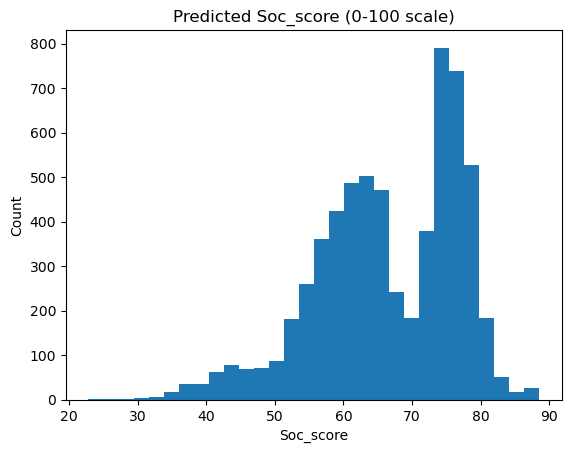

C:\Users\fbergsma1\AppData\Local\anaconda3\Lib\site-packages\pygam\pygam.py:1151: RuntimeWarning: invalid value encountered in scalar divide
  r2['McFadden'] = full_ll / null_ll
C:\Users\fbergsma1\AppData\Local\anaconda3\Lib\site-packages\pygam\pygam.py:1152: RuntimeWarning: invalid value encountered in scalar divide
  r2['McFadden_adj'] = 1.0 - (full_ll - self.statistics_['edof']) / null_ll



GAM Summary for Target: Gov_score
GAM                                                                                                       
=============================================== ==========================================================
Distribution:                      BinomialDist Effective DoF:                                      26.617
Link Function:                        LogitLink Log Likelihood:                                       -inf
Number of Samples:                         6296 AIC:                                                   inf
                                                AICc:                                                  inf
                                                UBRE:                                               2.1972
                                                Scale:                                                 1.0
                                                Pseudo R-Squared:                                   0.1068
Fe

C:\Users\fbergsma1\AppData\Local\Temp\ipykernel_24892\1254969062.py:64: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

  gam.summary()


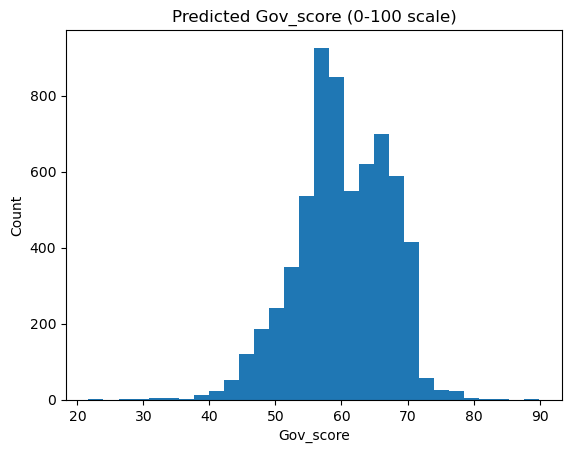

C:\Users\fbergsma1\AppData\Local\anaconda3\Lib\site-packages\pygam\pygam.py:1151: RuntimeWarning: invalid value encountered in scalar divide
  r2['McFadden'] = full_ll / null_ll
C:\Users\fbergsma1\AppData\Local\anaconda3\Lib\site-packages\pygam\pygam.py:1152: RuntimeWarning: invalid value encountered in scalar divide
  r2['McFadden_adj'] = 1.0 - (full_ll - self.statistics_['edof']) / null_ll



GAM Summary for Target: ESG_Comb_score
GAM                                                                                                       
=============================================== ==========================================================
Distribution:                      BinomialDist Effective DoF:                                     26.6649
Link Function:                        LogitLink Log Likelihood:                                       -inf
Number of Samples:                         6296 AIC:                                                   inf
                                                AICc:                                                  inf
                                                UBRE:                                               2.1266
                                                Scale:                                                 1.0
                                                Pseudo R-Squared:                                    0.1

C:\Users\fbergsma1\AppData\Local\Temp\ipykernel_24892\1254969062.py:64: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

  gam.summary()


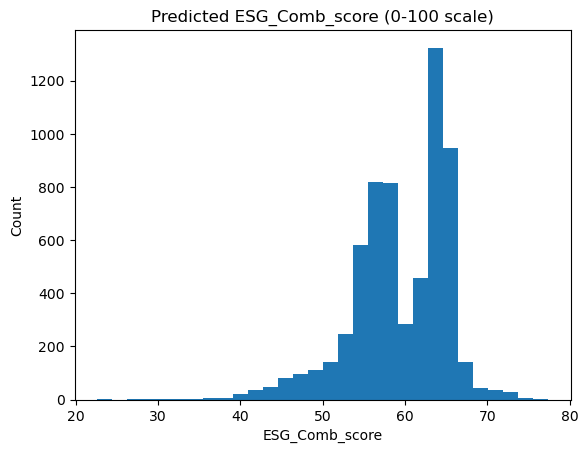

In [33]:
from pygam import GAM, s, f, te
from pygam.distributions import BinomialDist
from pygam.links import LogitLink
import numpy as np
import matplotlib.pyplot as plt

# Define predictors and ESG targets
predictors = ['EPS', 'ROA', 'ROE']
esg_targets = ['ESG_score', 'Env_score', 'Soc_score', 'Gov_score', 'ESG_Comb_score']

# Prepare DataFrame: categorical codes
df = df.copy()
df['Country of Exchange'] = df['Country of Exchange'].astype('category')
df['NAICS National Industry Name'] = df['NAICS National Industry Name'].astype('category')
df['Market Capitalization Category'] = df['Market Capitalization Category'].astype('category')

df['Country_code'] = df['Country of Exchange'].cat.codes
df['Industry_code'] = df['NAICS National Industry Name'].cat.codes
df['MCap_code'] = df['Market Capitalization Category'].cat.codes

# Dictionary of optimal penalties for each target
optimal_penalties_dict = {
    'ESG_score': 1000.0,
    'Env_score': 15.848931924611142,
    'Soc_score': 63.0957344480193,
    'Gov_score': 1000.0,
    'ESG_Comb_score': 1000.0,
}

# Loop over ESG targets
for target in esg_targets:
    df_clean = df.dropna(subset=predictors + [target, 'Country_code', 'Industry_code', 'MCap_code']).copy()

    # Clip targets to avoid 0 or 100 (logit issues)
    y_raw = df_clean[target].clip(0.01, 99.99)
    y_trans = y_raw / 100.0

    # Prepare feature matrix
    X_num = df_clean[predictors].values
    X_cat = df_clean[['Country_code', 'Industry_code', 'MCap_code']].values
    X = np.hstack([X_num, X_cat])

    # Get optimal lambda for current target
    lam = optimal_penalties_dict[target]

    # Build GAM model with optimal penalties
    gam = GAM(
        s(0, lam=lam) + s(1, lam=lam) + s(2, lam=lam) +
        f(3, lam=lam) + f(4, lam=lam) + f(5, lam=lam) +
        te(3, 4, lam=lam) + te(3, 5, lam=lam) + te(4, 5, lam=lam) +
        te(0, 1, lam=lam) + te(0, 2, lam=lam) + te(1, 2, lam=lam) +
        te(0, 3, lam=lam) + te(0, 4, lam=lam) + te(0, 5, lam=lam) +
        te(1, 3, lam=lam) + te(1, 4, lam=lam) + te(1, 5, lam=lam) +
        te(2, 3, lam=lam) + te(2, 4, lam=lam) + te(2, 5, lam=lam),
        link=LogitLink(),
        distribution=BinomialDist()
    ).fit(X, y_trans)

    # Predict scaled back to 0-100 scale
    y_pred_pct = gam.predict(X) * 100

    # Print summary
    print(f"\nGAM Summary for Target: {target}")
    gam.summary()

    # Show histogram of predicted values
    plt.hist(y_pred_pct, bins=30)
    plt.title(f'Predicted {target} (0-100 scale)')
    plt.xlabel(target)
    plt.ylabel('Count')
    plt.show()


# 0 - 100 try again

C:\Users\fbergsma1\AppData\Local\anaconda3\Lib\site-packages\pygam\pygam.py:1151: RuntimeWarning: invalid value encountered in scalar divide
  r2['McFadden'] = full_ll / null_ll
C:\Users\fbergsma1\AppData\Local\anaconda3\Lib\site-packages\pygam\pygam.py:1152: RuntimeWarning: invalid value encountered in scalar divide
  r2['McFadden_adj'] = 1.0 - (full_ll - self.statistics_['edof']) / null_ll



GAM Summary for Target: ESG_score
GAM                                                                                                       
=============================================== ==========================================================
Distribution:                      BinomialDist Effective DoF:                                    460.0531
Link Function:                        LogitLink Log Likelihood:                                       -inf
Number of Samples:                         6296 AIC:                                                   inf
                                                AICc:                                                  inf
                                                UBRE:                                               2.2681
                                                Scale:                                                 1.0
                                                Pseudo R-Squared:                                   0.5803
Fe

C:\Users\fbergsma1\AppData\Local\Temp\ipykernel_24892\2496276001.py:57: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

  gam.summary()


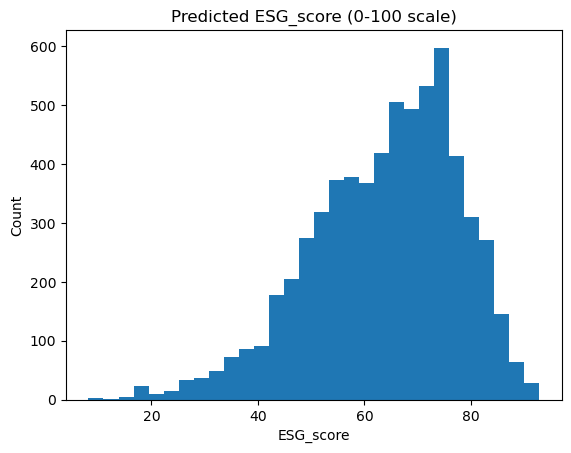

C:\Users\fbergsma1\AppData\Local\anaconda3\Lib\site-packages\pygam\pygam.py:1151: RuntimeWarning: invalid value encountered in scalar divide
  r2['McFadden'] = full_ll / null_ll
C:\Users\fbergsma1\AppData\Local\anaconda3\Lib\site-packages\pygam\pygam.py:1152: RuntimeWarning: invalid value encountered in scalar divide
  r2['McFadden_adj'] = 1.0 - (full_ll - self.statistics_['edof']) / null_ll



GAM Summary for Target: Env_score
GAM                                                                                                       
=============================================== ==========================================================
Distribution:                      BinomialDist Effective DoF:                                    455.5189
Link Function:                        LogitLink Log Likelihood:                                       -inf
Number of Samples:                         6296 AIC:                                                   inf
                                                AICc:                                                  inf
                                                UBRE:                                               2.3048
                                                Scale:                                                 1.0
                                                Pseudo R-Squared:                                   0.6253
Fe

C:\Users\fbergsma1\AppData\Local\Temp\ipykernel_24892\2496276001.py:57: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

  gam.summary()


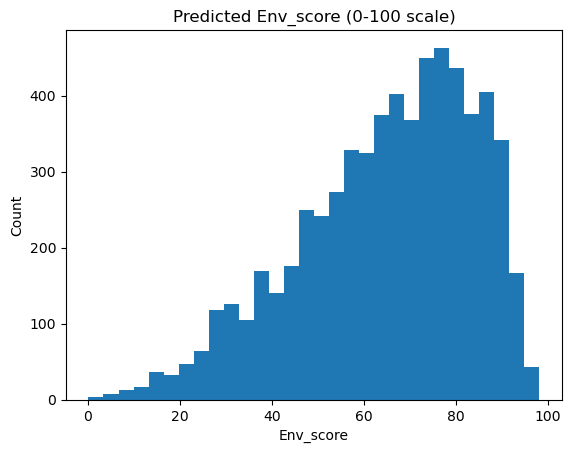

C:\Users\fbergsma1\AppData\Local\anaconda3\Lib\site-packages\pygam\pygam.py:1151: RuntimeWarning: invalid value encountered in scalar divide
  r2['McFadden'] = full_ll / null_ll
C:\Users\fbergsma1\AppData\Local\anaconda3\Lib\site-packages\pygam\pygam.py:1152: RuntimeWarning: invalid value encountered in scalar divide
  r2['McFadden_adj'] = 1.0 - (full_ll - self.statistics_['edof']) / null_ll



GAM Summary for Target: Soc_score
GAM                                                                                                       
=============================================== ==========================================================
Distribution:                      BinomialDist Effective DoF:                                    456.6991
Link Function:                        LogitLink Log Likelihood:                                       -inf
Number of Samples:                         6296 AIC:                                                   inf
                                                AICc:                                                  inf
                                                UBRE:                                               2.2986
                                                Scale:                                                 1.0
                                                Pseudo R-Squared:                                   0.5509
Fe

C:\Users\fbergsma1\AppData\Local\Temp\ipykernel_24892\2496276001.py:57: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

  gam.summary()


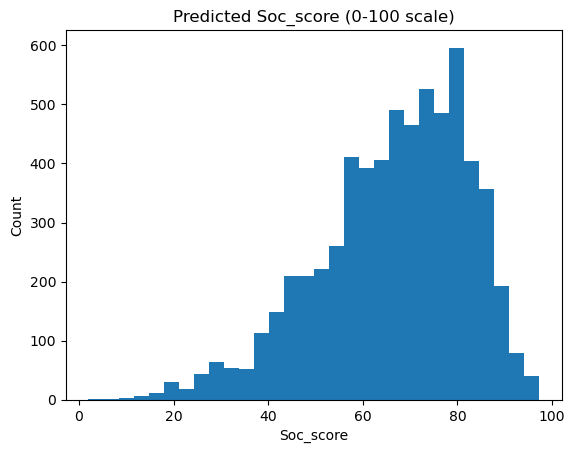

C:\Users\fbergsma1\AppData\Local\anaconda3\Lib\site-packages\pygam\pygam.py:1151: RuntimeWarning: invalid value encountered in scalar divide
  r2['McFadden'] = full_ll / null_ll
C:\Users\fbergsma1\AppData\Local\anaconda3\Lib\site-packages\pygam\pygam.py:1152: RuntimeWarning: invalid value encountered in scalar divide
  r2['McFadden_adj'] = 1.0 - (full_ll - self.statistics_['edof']) / null_ll



GAM Summary for Target: Gov_score
GAM                                                                                                       
=============================================== ==========================================================
Distribution:                      BinomialDist Effective DoF:                                    461.2721
Link Function:                        LogitLink Log Likelihood:                                       -inf
Number of Samples:                         6296 AIC:                                                   inf
                                                AICc:                                                  inf
                                                UBRE:                                                2.318
                                                Scale:                                                 1.0
                                                Pseudo R-Squared:                                   0.4563
Fe

C:\Users\fbergsma1\AppData\Local\Temp\ipykernel_24892\2496276001.py:57: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

  gam.summary()


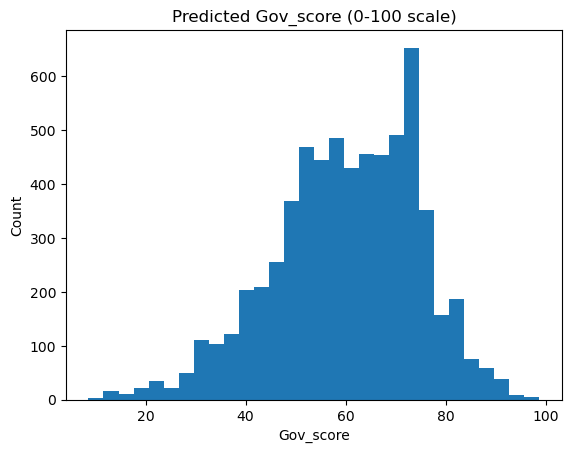

C:\Users\fbergsma1\AppData\Local\anaconda3\Lib\site-packages\pygam\pygam.py:1151: RuntimeWarning: invalid value encountered in scalar divide
  r2['McFadden'] = full_ll / null_ll
C:\Users\fbergsma1\AppData\Local\anaconda3\Lib\site-packages\pygam\pygam.py:1152: RuntimeWarning: invalid value encountered in scalar divide
  r2['McFadden_adj'] = 1.0 - (full_ll - self.statistics_['edof']) / null_ll



GAM Summary for Target: ESG_Comb_score
GAM                                                                                                       
=============================================== ==========================================================
Distribution:                      BinomialDist Effective DoF:                                     462.106
Link Function:                        LogitLink Log Likelihood:                                       -inf
Number of Samples:                         6296 AIC:                                                   inf
                                                AICc:                                                  inf
                                                UBRE:                                               2.2761
                                                Scale:                                                 1.0
                                                Pseudo R-Squared:                                   0.46

C:\Users\fbergsma1\AppData\Local\Temp\ipykernel_24892\2496276001.py:57: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

  gam.summary()


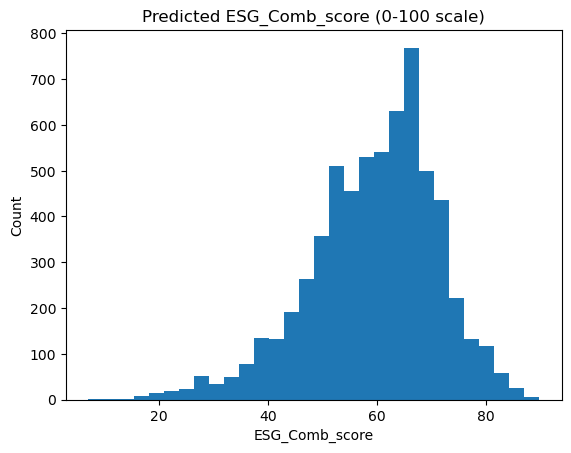

In [9]:
from pygam import GAM, s, f, te
from pygam.distributions import BinomialDist
from pygam.links import LogitLink
import numpy as np


# Define predictors and ESG targets
predictors = ['EPS', 'ROA', 'ROE']
esg_targets = ['ESG_score', 'Env_score', 'Soc_score', 'Gov_score', 'ESG_Comb_score']

# Prepare DataFrame: categorical codes
df = df.copy()
df['Country of Exchange'] = df['Country of Exchange'].astype('category')
df['NAICS National Industry Name'] = df['NAICS National Industry Name'].astype('category')
df['Market Capitalization Category'] = df['Market Capitalization Category'].astype('category')

df['Country_code'] = df['Country of Exchange'].cat.codes
df['Industry_code'] = df['NAICS National Industry Name'].cat.codes
df['MCap_code'] = df['Market Capitalization Category'].cat.codes

# Fixed penalty for all terms
fixed_lambda = 0.001

# Loop over ESG targets
for target in esg_targets:
    df_clean = df.dropna(subset=predictors + [target, 'Country_code', 'Industry_code', 'MCap_code']).copy()

    # Clip targets just in case they contain edge values
    y_raw = df_clean[target].clip(0.01, 99.99)  # avoid 0 or 100 which are undefined under logit
    y_trans = y_raw / 100.0                     # Scale to [0.01, 0.9999]

    # Create feature matrix
    X_num = df_clean[predictors].values
    X_cat = df_clean[['Country_code', 'Industry_code', 'MCap_code']].values
    X = np.hstack([X_num, X_cat])

    # Build GAM model with a logit link to constrain predictions
    gam = GAM(
        s(0, lam=fixed_lambda) + s(1, lam=fixed_lambda) + s(2, lam=fixed_lambda) +
        f(3, lam=fixed_lambda) + f(4, lam=fixed_lambda) + f(5, lam=fixed_lambda) +
        te(3, 4, lam=fixed_lambda) + te(3, 5, lam=fixed_lambda) + te(4, 5, lam=fixed_lambda) +
        te(0, 1, lam=fixed_lambda) + te(0, 2, lam=fixed_lambda) + te(1, 2, lam=fixed_lambda) +
        te(0, 3, lam=fixed_lambda) + te(0, 4, lam=fixed_lambda) + te(0, 5, lam=fixed_lambda) +
        te(1, 3, lam=fixed_lambda) + te(1, 4, lam=fixed_lambda) + te(1, 5, lam=fixed_lambda) +
        te(2, 3, lam=fixed_lambda) + te(2, 4, lam=fixed_lambda) + te(2, 5, lam=fixed_lambda),
        link=LogitLink(),
        distribution=BinomialDist()
    ).fit(X, y_trans)



    # Predict (results will be between 0 and 1), so scale back to 0–100
    y_pred_pct = gam.predict(X) * 100

    # Print summary
    print(f"\nGAM Summary for Target: {target}")
    gam.summary()

    # Optional: Show histogram of predicted values
    plt.hist(y_pred_pct, bins=30)
    plt.title(f'Predicted {target} (0-100 scale)')
    plt.xlabel(target)
    plt.ylabel('Count')
    plt.show()


In [11]:
import os
import pickle
import numpy as np
from pygam import GAM, s, f, te
from pygam.links import LogitLink
from pygam.distributions import BinomialDist

# Directory to save models
model_dir = 'saved_gam_models'
os.makedirs(model_dir, exist_ok=True)

# Loop over ESG targets
for target in esg_targets:
    df_clean = df.dropna(subset=predictors + [target, 'Country_code', 'Industry_code', 'MCap_code']).copy()

    # Create feature matrix
    X_num = df_clean[predictors].values
    X_cat = df_clean[['Country_code', 'Industry_code', 'MCap_code']].values
    X = np.hstack([X_num, X_cat])
    
    # Target values scaled to (0, 1)
    y = df_clean[target].values
    y_trans = y / 100  # Logit link expects values in (0, 1)

    # Build and fit GAM model with logit link and binomial distribution
    gam = GAM(
        s(0, lam=fixed_lambda) + s(1, lam=fixed_lambda) + s(2, lam=fixed_lambda) +
        f(3, lam=fixed_lambda) + f(4, lam=fixed_lambda) + f(5, lam=fixed_lambda) +
        te(3, 4, lam=fixed_lambda) + te(3, 5, lam=fixed_lambda) + te(4, 5, lam=fixed_lambda) +
        te(0, 1, lam=fixed_lambda) + te(0, 2, lam=fixed_lambda) + te(1, 2, lam=fixed_lambda) +
        te(0, 3, lam=fixed_lambda) + te(0, 4, lam=fixed_lambda) + te(0, 5, lam=fixed_lambda) +
        te(1, 3, lam=fixed_lambda) + te(1, 4, lam=fixed_lambda) + te(1, 5, lam=fixed_lambda) +
        te(2, 3, lam=fixed_lambda) + te(2, 4, lam=fixed_lambda) + te(2, 5, lam=fixed_lambda),
        link=LogitLink(),
        distribution=BinomialDist()
    ).fit(X, y_trans)

    # Predict and scale back to 0–100
    y_pred = gam.predict(X) * 100

    # Check min and max values
    min_pred = y_pred.min()
    max_pred = y_pred.max()

    print(f"🔍 Predicted {target} range: {min_pred:.2f} to {max_pred:.2f}")
    if (min_pred < 0) or (max_pred > 100):
        print(f"⚠️ Warning: Predicted values for {target} are outside the 0–100 range!")
    else:
        print(f"✅ All predicted values for {target} are within the 0–100 range.")

    # Save model
    model_path = os.path.join(model_dir, f'gam_model_{target}.pkl')
    with open(model_path, 'wb') as file_handle:
        pickle.dump(gam, file_handle)

    print(f"💾 Saved model for {target} to {model_path}")


C:\Users\fbergsma1\AppData\Local\anaconda3\Lib\site-packages\pygam\pygam.py:1151: RuntimeWarning: invalid value encountered in scalar divide
  r2['McFadden'] = full_ll / null_ll
C:\Users\fbergsma1\AppData\Local\anaconda3\Lib\site-packages\pygam\pygam.py:1152: RuntimeWarning: invalid value encountered in scalar divide
  r2['McFadden_adj'] = 1.0 - (full_ll - self.statistics_['edof']) / null_ll


🔍 Predicted ESG_score range: 8.17 to 92.87
✅ All predicted values for ESG_score are within the 0–100 range.
💾 Saved model for ESG_score to saved_gam_models\gam_model_ESG_score.pkl


C:\Users\fbergsma1\AppData\Local\anaconda3\Lib\site-packages\pygam\pygam.py:1151: RuntimeWarning: invalid value encountered in scalar divide
  r2['McFadden'] = full_ll / null_ll
C:\Users\fbergsma1\AppData\Local\anaconda3\Lib\site-packages\pygam\pygam.py:1152: RuntimeWarning: invalid value encountered in scalar divide
  r2['McFadden_adj'] = 1.0 - (full_ll - self.statistics_['edof']) / null_ll


🔍 Predicted Env_score range: 0.14 to 98.17
✅ All predicted values for Env_score are within the 0–100 range.
💾 Saved model for Env_score to saved_gam_models\gam_model_Env_score.pkl


C:\Users\fbergsma1\AppData\Local\anaconda3\Lib\site-packages\pygam\pygam.py:1151: RuntimeWarning: invalid value encountered in scalar divide
  r2['McFadden'] = full_ll / null_ll
C:\Users\fbergsma1\AppData\Local\anaconda3\Lib\site-packages\pygam\pygam.py:1152: RuntimeWarning: invalid value encountered in scalar divide
  r2['McFadden_adj'] = 1.0 - (full_ll - self.statistics_['edof']) / null_ll


🔍 Predicted Soc_score range: 2.00 to 97.31
✅ All predicted values for Soc_score are within the 0–100 range.
💾 Saved model for Soc_score to saved_gam_models\gam_model_Soc_score.pkl


C:\Users\fbergsma1\AppData\Local\anaconda3\Lib\site-packages\pygam\pygam.py:1151: RuntimeWarning: invalid value encountered in scalar divide
  r2['McFadden'] = full_ll / null_ll
C:\Users\fbergsma1\AppData\Local\anaconda3\Lib\site-packages\pygam\pygam.py:1152: RuntimeWarning: invalid value encountered in scalar divide
  r2['McFadden_adj'] = 1.0 - (full_ll - self.statistics_['edof']) / null_ll


🔍 Predicted Gov_score range: 8.57 to 98.76
✅ All predicted values for Gov_score are within the 0–100 range.
💾 Saved model for Gov_score to saved_gam_models\gam_model_Gov_score.pkl


C:\Users\fbergsma1\AppData\Local\anaconda3\Lib\site-packages\pygam\pygam.py:1151: RuntimeWarning: invalid value encountered in scalar divide
  r2['McFadden'] = full_ll / null_ll
C:\Users\fbergsma1\AppData\Local\anaconda3\Lib\site-packages\pygam\pygam.py:1152: RuntimeWarning: invalid value encountered in scalar divide
  r2['McFadden_adj'] = 1.0 - (full_ll - self.statistics_['edof']) / null_ll


🔍 Predicted ESG_Comb_score range: 7.01 to 89.87
✅ All predicted values for ESG_Comb_score are within the 0–100 range.
💾 Saved model for ESG_Comb_score to saved_gam_models\gam_model_ESG_Comb_score.pkl


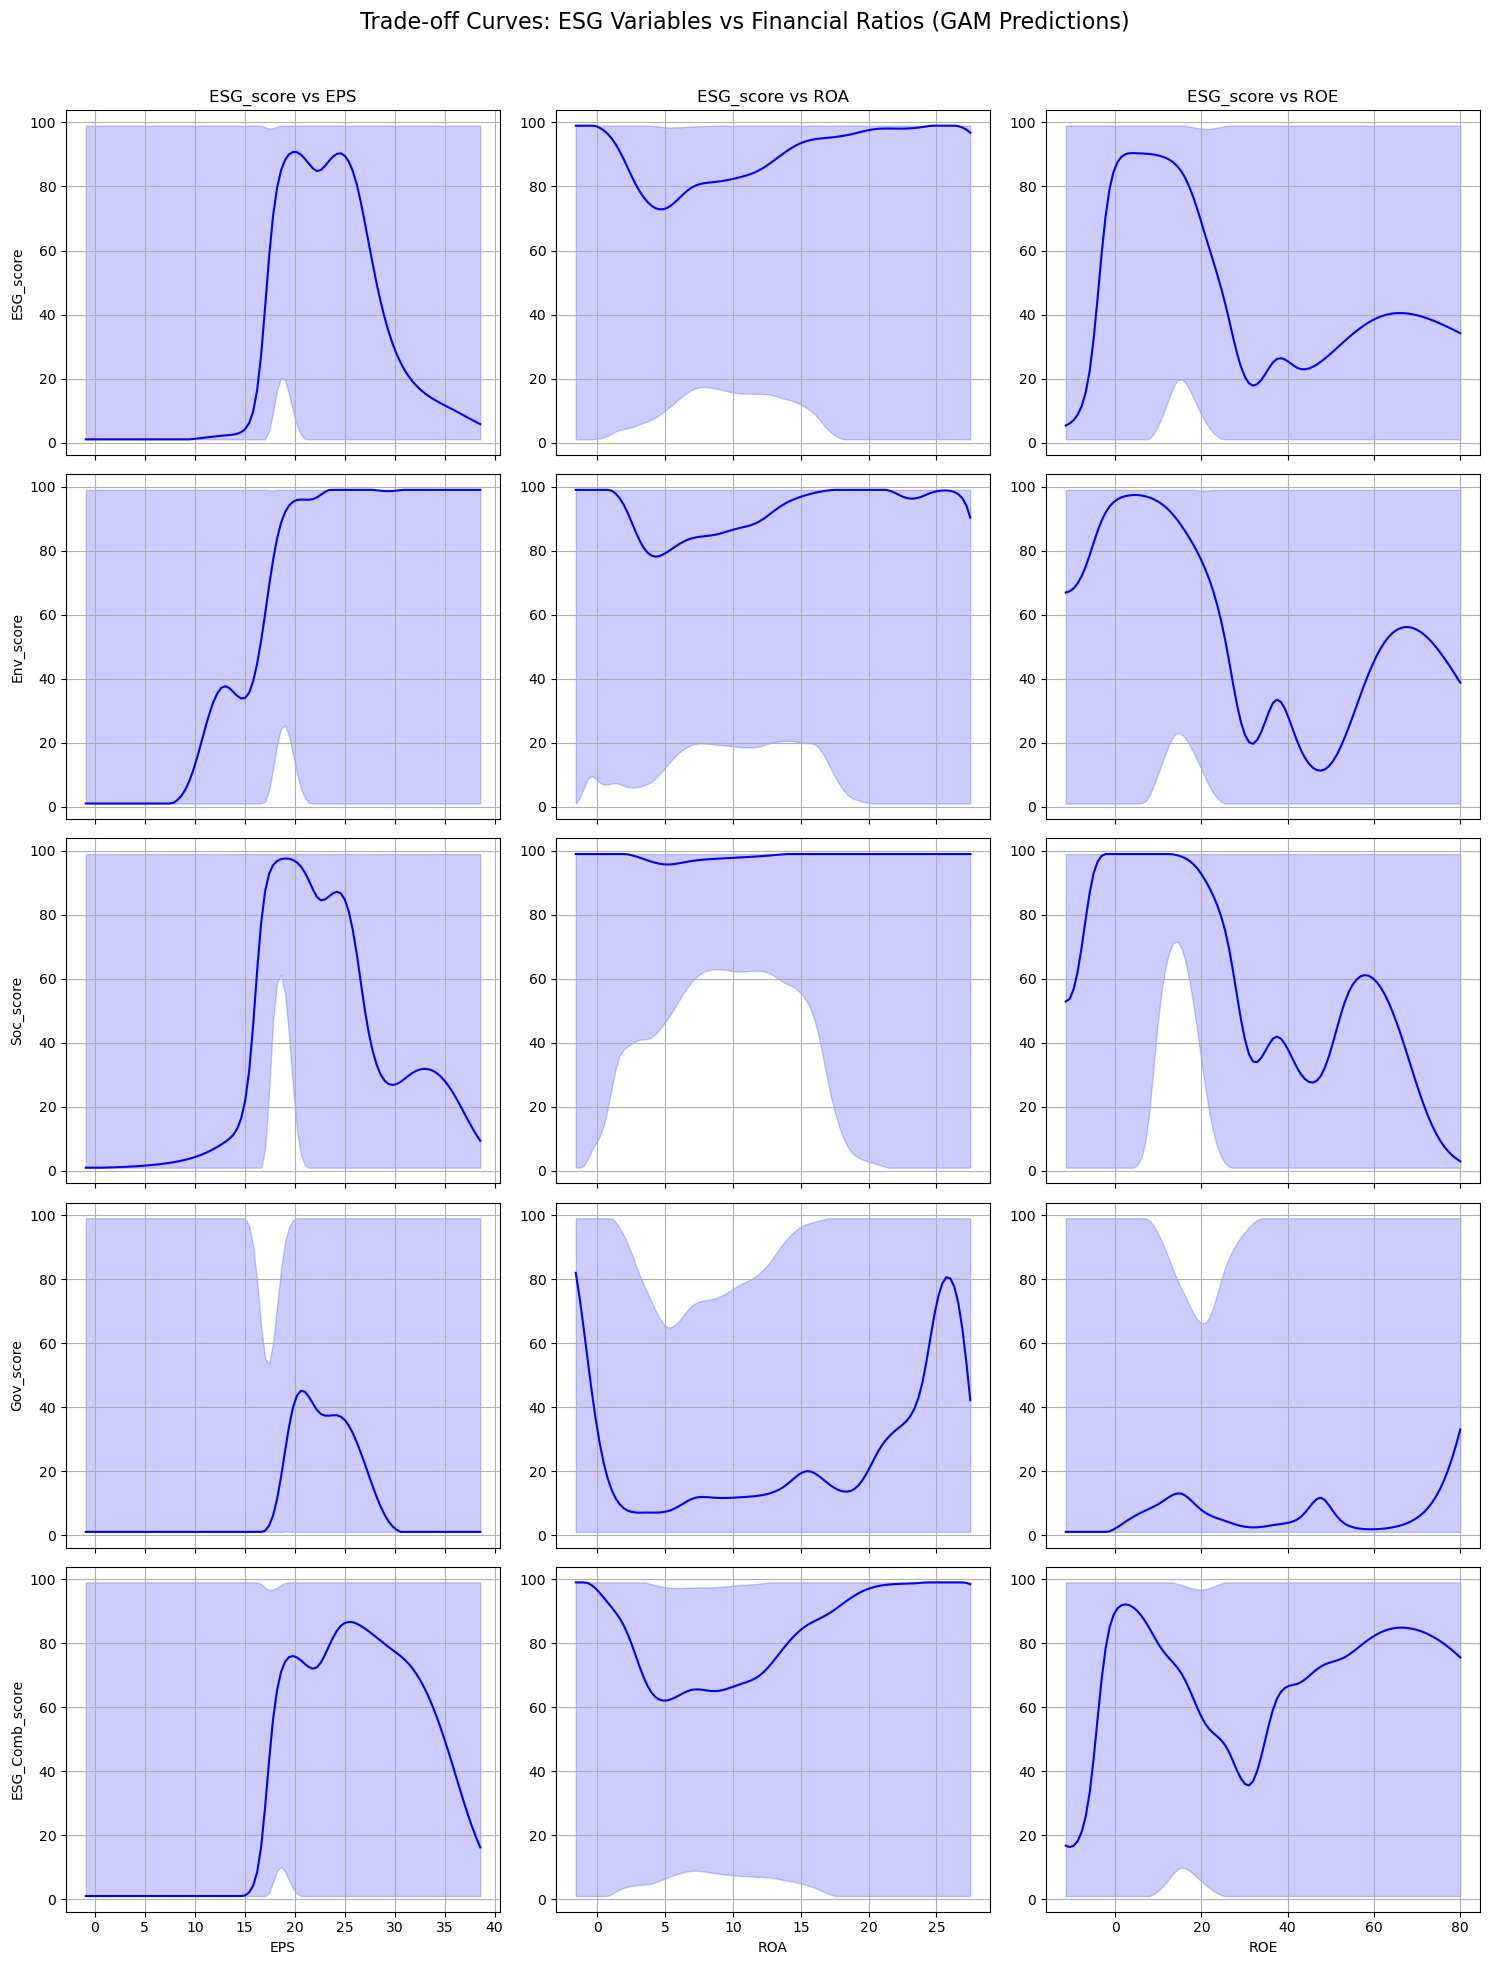

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
import os

# Define predictors and ESG targets
predictors = ['EPS', 'ROA', 'ROE']
esg_targets = ['ESG_score', 'Env_score', 'Soc_score', 'Gov_score', 'ESG_Comb_score']

# Directory where models are saved
model_dir = 'saved_gam_models'

# Prepare figure
fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(15, 20), sharex='col')
fig.suptitle('Trade-off Curves: ESG Variables vs Financial Ratios (GAM Predictions)', fontsize=16, y=0.92)

# Loop over ESG targets
for row_idx, target in enumerate(esg_targets):
    # Load the GAM model for the current ESG target
    model_path = os.path.join(model_dir, f'gam_model_{target}.pkl')
    with open(model_path, 'rb') as file_handle:
        gam = pickle.load(file_handle)

    # Clean data
    df_clean = df.dropna(subset=predictors + [target, 'Country_code', 'Industry_code', 'MCap_code']).copy()

    # Reconstruct input feature matrix
    X_num = df_clean[predictors].values
    X_cat = df_clean[['Country_code', 'Industry_code', 'MCap_code']].values
    X_train = np.hstack([X_num, X_cat])

    # Get median values for fixed baseline
    X_baseline = np.median(X_train, axis=0)
    feature_indices = {name: idx for idx, name in enumerate(predictors + ['Country_code', 'Industry_code', 'MCap_code'])}

    # Loop over financial ratios (columns)
    for col_idx, fin_ratio in enumerate(predictors):
        idx_fin = feature_indices[fin_ratio]

        # Grid for current financial ratio
        fin_min, fin_max = X_train[:, idx_fin].min(), X_train[:, idx_fin].max()
        fin_grid = np.linspace(fin_min, fin_max, 100)

        # Prediction input: vary current ratio, fix all else at median
        X_pred = np.tile(X_baseline, (100, 1))
        X_pred[:, idx_fin] = fin_grid

        # Clip predictions to avoid exploding uncertainty
        esg_pred = np.clip(gam.predict(X_pred), 0.01, 0.99) * 100
        
        # Also clip CI bounds
        conf_int = np.clip(gam.confidence_intervals(X_pred), 0.01, 0.99) * 100
        
        # Limit the financial ratio grid to supported data range
        fin_min, fin_max = np.quantile(X_train[:, idx_fin], [0.01, 0.99])
        fin_grid = np.linspace(fin_min, fin_max, 100)

        # # Limit the financial ratio grid to the 1st–99th percentile range
        # fin_min, fin_max = np.quantile(X_train[:, idx_fin], [0.01, 0.99])
        # fin_grid = np.linspace(fin_min, fin_max, 100)
        
        # # Prediction input: vary current ratio, fix all else at median
        # X_pred = np.tile(X_baseline, (100, 1))
        # X_pred[:, idx_fin] = fin_grid
        
        # # Predict in (0,1) and scale to 0–100
        # esg_pred = np.clip(gam.predict(X_pred), 0.01, 0.99) * 100
        # conf_int = np.clip(gam.confidence_intervals(X_pred), 0.01, 0.99) * 100



        
        # Predict in (0, 1) and scale to 0–100
        # esg_pred = gam.predict(X_pred) * 100

        # Confidence intervals in predicted scale (0–1), then scaled to 0–100
        # conf_int = gam.confidence_intervals(X_pred) * 100

        # Plot in subplot
        ax = axes[row_idx, col_idx]
        ax.plot(fin_grid, esg_pred, label=f'{target}', color='blue')
        ax.fill_between(fin_grid, conf_int[:, 0], conf_int[:, 1], color='blue', alpha=0.2)
        ax.set_title(f'{target} vs {fin_ratio}' if row_idx == 0 else "")
        if col_idx == 0:
            ax.set_ylabel(f'{target}')
        if row_idx == 4:
            ax.set_xlabel(fin_ratio)
        ax.grid(True)

# Adjust layout before adding suptitle
plt.tight_layout()
fig.subplots_adjust(top=0.93)
fig.suptitle('Trade-off Curves: ESG Variables vs Financial Ratios (GAM Predictions)', fontsize=16)

# Save the plot if needed
# plt.savefig('esg_tradeoff_curves.pdf', format='pdf', bbox_inches='tight')

# Show plot
plt.show()


## 0 - 100 Boundaries in GAM

In [23]:
import pandas as pd
import numpy as np
from pygam import LinearGAM, s, f, te
import matplotlib.pyplot as plt

# Define predictors and ESG targets
predictors = ['EPS', 'ROA', 'ROE']
esg_targets = ['ESG_score', 'Env_score', 'Soc_score', 'Gov_score', 'ESG_Comb_score']

# Prepare DataFrame: categorical codes
df = df.copy()
df['Country of Exchange'] = df['Country of Exchange'].astype('category')
df['NAICS National Industry Name'] = df['NAICS National Industry Name'].astype('category')
df['Market Capitalization Category'] = df['Market Capitalization Category'].astype('category')

df['Country_code'] = df['Country of Exchange'].cat.codes
df['Industry_code'] = df['NAICS National Industry Name'].cat.codes
df['MCap_code'] = df['Market Capitalization Category'].cat.codes

# Fixed penalty for all terms
fixed_lambda = 0.001

# Small epsilon to avoid issues with logit of 0 or 1
eps = 1e-3

# Loop over ESG targets
for target in esg_targets:
    df_clean = df.dropna(subset=predictors + [target, 'Country_code', 'Industry_code', 'MCap_code']).copy()

    # Transform target to [0, 1] and clip to avoid logit overflow
    y_raw = df_clean[target].values
    y_scaled = np.clip(y_raw / 100, eps, 1 - eps)
    y_logit = np.log(y_scaled / (1 - y_scaled))

    # Feature matrix
    X_num = df_clean[predictors].values
    X_cat = df_clean[['Country_code', 'Industry_code', 'MCap_code']].values
    X = np.hstack([X_num, X_cat])

    # Fit GAM in logit space
    gam = LinearGAM(
        s(0, lam=fixed_lambda) + s(1, lam=fixed_lambda) + s(2, lam=fixed_lambda) +  # EPS, ROA, ROE
        f(3, lam=fixed_lambda) + f(4, lam=fixed_lambda) + f(5, lam=fixed_lambda) +  # Country, Industry, MCap
        te(3, 4, lam=fixed_lambda) + te(3, 5, lam=fixed_lambda) + te(4, 5, lam=fixed_lambda) +  # Cat × Cat
        te(0, 1, lam=fixed_lambda) + te(0, 2, lam=fixed_lambda) + te(1, 2, lam=fixed_lambda) +  # Num × Num
        te(0, 3, lam=fixed_lambda) + te(0, 4, lam=fixed_lambda) + te(0, 5, lam=fixed_lambda) +  # Num × Cat
        te(1, 3, lam=fixed_lambda) + te(1, 4, lam=fixed_lambda) + te(1, 5, lam=fixed_lambda) +
        te(2, 3, lam=fixed_lambda) + te(2, 4, lam=fixed_lambda) + te(2, 5, lam=fixed_lambda)
    ).fit(X, y_logit)

    # Predict in logit space, then back-transform to [0, 100]
    y_pred_logit = gam.predict(X)
    y_pred_scaled = 1 / (1 + np.exp(-y_pred_logit))
    y_pred = y_pred_scaled * 100

    # Print summary
    print(f"\nGAM Summary for Target: {target}")
    gam.summary()

    # Check if predictions are within bounds
    print(f"✅ Predictions for {target} in [0, 100]: {np.all((y_pred >= 0) & (y_pred <= 100))}")



GAM Summary for Target: ESG_score
LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                    501.5688
Link Function:                     IdentityLink Log Likelihood:                                 -7464.4907
Number of Samples:                         6296 AIC:                                            15934.1191
                                                AICc:                                           16021.5014
                                                GCV:                                                0.4059
                                                Scale:                                              0.3481
                                                Pseudo R-Squared:                                   0.6022
Fe

C:\Users\fbergsma1\AppData\Local\Temp\ipykernel_10376\3613152705.py:58: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

  gam.summary()



GAM Summary for Target: Env_score
LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                    501.5688
Link Function:                     IdentityLink Log Likelihood:                                 -9029.7151
Number of Samples:                         6296 AIC:                                            19064.5679
                                                AICc:                                           19151.9502
                                                GCV:                                                1.2861
                                                Scale:                                              1.1031
                                                Pseudo R-Squared:                                   0.5994
Fe

C:\Users\fbergsma1\AppData\Local\Temp\ipykernel_10376\3613152705.py:58: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

  gam.summary()



GAM Summary for Target: Soc_score
LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                    501.5688
Link Function:                     IdentityLink Log Likelihood:                                  -7394.482
Number of Samples:                         6296 AIC:                                            15794.1016
                                                AICc:                                           15881.4839
                                                GCV:                                                0.6978
                                                Scale:                                              0.5985
                                                Pseudo R-Squared:                                   0.5751
Fe

C:\Users\fbergsma1\AppData\Local\Temp\ipykernel_10376\3613152705.py:58: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

  gam.summary()



GAM Summary for Target: Gov_score
LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                    501.5688
Link Function:                     IdentityLink Log Likelihood:                                 -7585.9402
Number of Samples:                         6296 AIC:                                            16177.0181
                                                AICc:                                           16264.4004
                                                GCV:                                                0.7802
                                                Scale:                                              0.6692
                                                Pseudo R-Squared:                                   0.4867
Fe

C:\Users\fbergsma1\AppData\Local\Temp\ipykernel_10376\3613152705.py:58: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

  gam.summary()



GAM Summary for Target: ESG_Comb_score
LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                    501.5688
Link Function:                     IdentityLink Log Likelihood:                                 -7348.2018
Number of Samples:                         6296 AIC:                                            15701.5412
                                                AICc:                                           15788.9235
                                                GCV:                                                0.4336
                                                Scale:                                              0.3719
                                                Pseudo R-Squared:                                   0.48

C:\Users\fbergsma1\AppData\Local\Temp\ipykernel_10376\3613152705.py:58: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

  gam.summary()


In [28]:
import os
import pickle
import numpy as np
from pygam import LinearGAM, s, f, te

# Directory to save models
model_dir = 'saved_gam_models'
os.makedirs(model_dir, exist_ok=True)

# Small epsilon to avoid logit(0) or logit(1)
eps = 1e-3

# Loop over ESG targets
for target in esg_targets:
    # Drop rows with missing values
    df_clean = df.dropna(subset=predictors + [target, 'Country_code', 'Industry_code', 'MCap_code']).copy()

    # Prepare features
    X_num = df_clean[predictors].values
    X_cat = df_clean[['Country_code', 'Industry_code', 'MCap_code']].values
    X = np.hstack([X_num, X_cat])

    # Scale and logit-transform target
    y_raw = df_clean[target].values
    y_scaled = np.clip(y_raw / 100, eps, 1 - eps)
    y_logit = np.log(y_scaled / (1 - y_scaled))

    # Build and fit GAM model
    gam = LinearGAM(
        s(0, lam=fixed_lambda) + s(1, lam=fixed_lambda) + s(2, lam=fixed_lambda) +
        f(3, lam=fixed_lambda) + f(4, lam=fixed_lambda) + f(5, lam=fixed_lambda) +
        te(3, 4, lam=fixed_lambda) + te(3, 5, lam=fixed_lambda) + te(4, 5, lam=fixed_lambda) +
        te(0, 1, lam=fixed_lambda) + te(0, 2, lam=fixed_lambda) + te(1, 2, lam=fixed_lambda) +
        te(0, 3, lam=fixed_lambda) + te(0, 4, lam=fixed_lambda) + te(0, 5, lam=fixed_lambda) +
        te(1, 3, lam=fixed_lambda) + te(1, 4, lam=fixed_lambda) + te(1, 5, lam=fixed_lambda) +
        te(2, 3, lam=fixed_lambda) + te(2, 4, lam=fixed_lambda) + te(2, 5, lam=fixed_lambda)
    ).fit(X, y_logit)

    # Predict in logit space and back-transform
    y_pred_logit = gam.predict(X)
    y_pred_scaled = 1 / (1 + np.exp(-y_pred_logit))
    y_pred = y_pred_scaled * 100

    # Check prediction range
    min_pred = y_pred.min()
    max_pred = y_pred.max()

    print(f"\n🔍 Predicted {target} range: {min_pred:.2f} to {max_pred:.2f}")
    if (min_pred < 0) or (max_pred > 100):
        print(f"⚠️ Warning: Predicted values for {target} are outside the 0–100 range!")
    else:
        print(f"✅ All predicted values for {target} are within the 0–100 range.")

    # Save model
    model_path = os.path.join(model_dir, f'gam_model_{target}.pkl')
    with open(model_path, 'wb') as file_handle:
        pickle.dump(gam, file_handle)

    print(f"✅ Saved model for {target} to {model_path}")



🔍 Predicted ESG_score range: 8.43 to 93.89
✅ All predicted values for ESG_score are within the 0–100 range.
✅ Saved model for ESG_score to saved_gam_models\gam_model_ESG_score.pkl

🔍 Predicted Env_score range: 0.04 to 97.28
✅ All predicted values for Env_score are within the 0–100 range.
✅ Saved model for Env_score to saved_gam_models\gam_model_Env_score.pkl

🔍 Predicted Soc_score range: 1.55 to 98.07
✅ All predicted values for Soc_score are within the 0–100 range.
✅ Saved model for Soc_score to saved_gam_models\gam_model_Soc_score.pkl

🔍 Predicted Gov_score range: 7.03 to 97.78
✅ All predicted values for Gov_score are within the 0–100 range.
✅ Saved model for Gov_score to saved_gam_models\gam_model_Gov_score.pkl

🔍 Predicted ESG_Comb_score range: 7.49 to 89.96
✅ All predicted values for ESG_Comb_score are within the 0–100 range.
✅ Saved model for ESG_Comb_score to saved_gam_models\gam_model_ESG_Comb_score.pkl


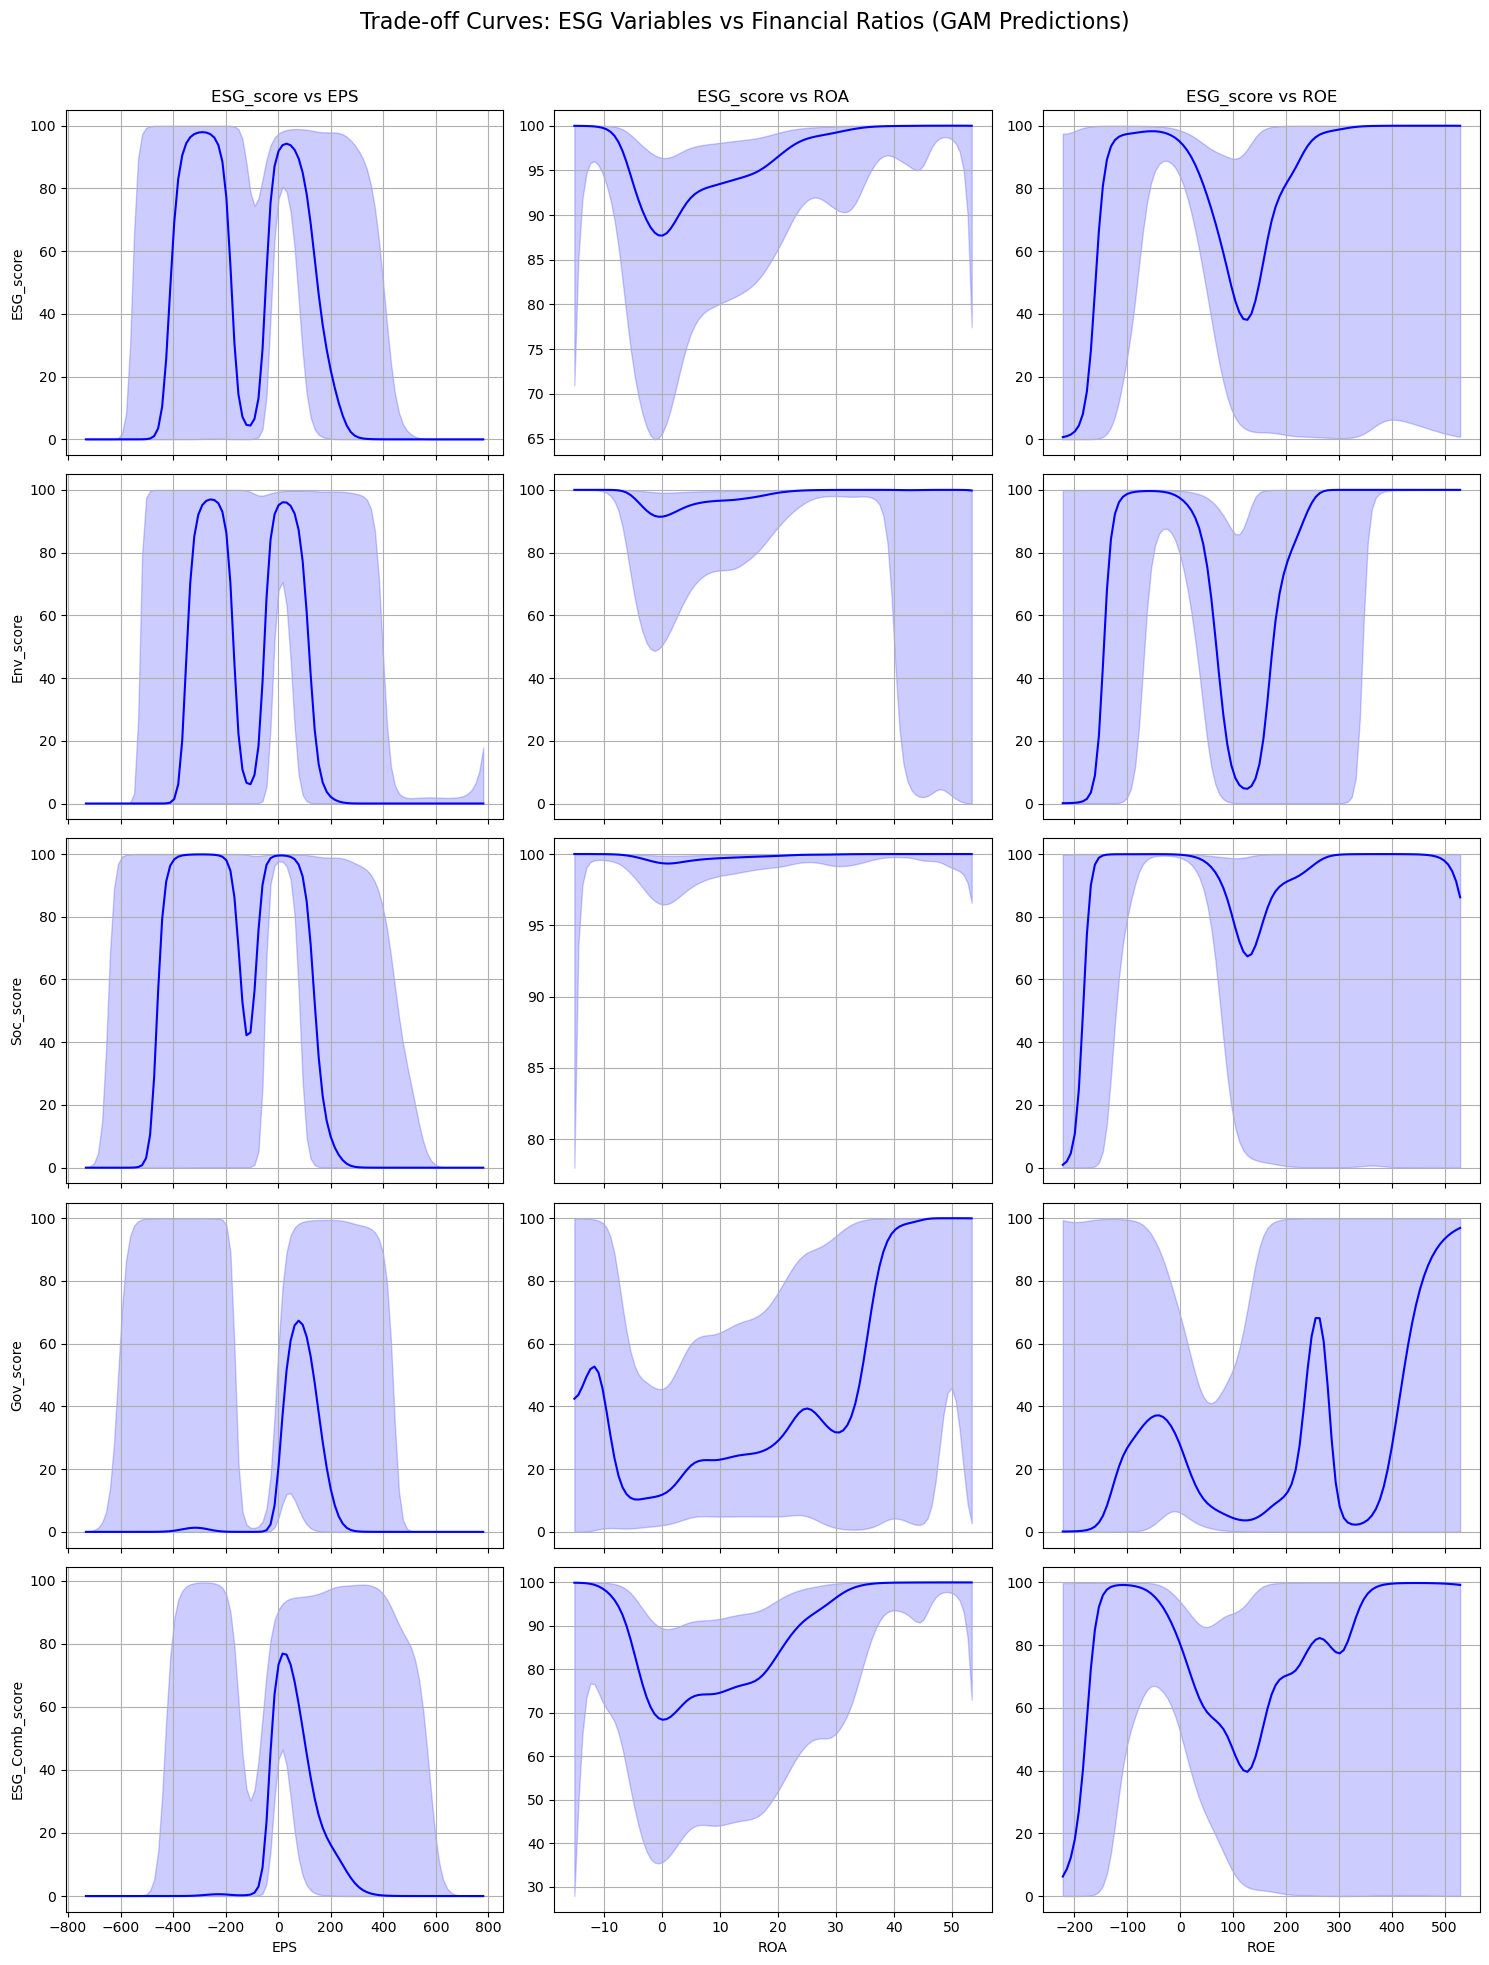

In [32]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
import os

# Define predictors and ESG targets
predictors = ['EPS', 'ROA', 'ROE']
esg_targets = ['ESG_score', 'Env_score', 'Soc_score', 'Gov_score', 'ESG_Comb_score']

# Directory where models are saved
model_dir = 'saved_gam_models'

# Logistic (sigmoid) function to back-transform from logit space
def logistic(x):
    return 1 / (1 + np.exp(-x))

# Prepare figure
fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(15, 20), sharex='col')
fig.suptitle('Trade-off Curves: ESG Variables vs Financial Ratios (GAM Predictions)', fontsize=16, y=0.92)

# Loop over ESG targets
for row_idx, target in enumerate(esg_targets):
    # Load the GAM model for the current ESG target
    model_path = os.path.join(model_dir, f'gam_model_{target}.pkl')
    with open(model_path, 'rb') as file_handle:
        gam = pickle.load(file_handle)

    # Clean data
    df_clean = df.dropna(subset=predictors + [target, 'Country_code', 'Industry_code', 'MCap_code']).copy()

    # Reconstruct input feature matrix
    X_num = df_clean[predictors].values
    X_cat = df_clean[['Country_code', 'Industry_code', 'MCap_code']].values
    X_train = np.hstack([X_num, X_cat])

    # Get median values
    X_baseline = np.median(X_train, axis=0)
    feature_indices = {name: idx for idx, name in enumerate(predictors + ['Country_code', 'Industry_code', 'MCap_code'])}

    # Loop over financial ratios (columns)
    for col_idx, fin_ratio in enumerate(predictors):
        idx_fin = feature_indices[fin_ratio]

        # Grid for current financial ratio
        fin_min, fin_max = X_train[:, idx_fin].min(), X_train[:, idx_fin].max()
        fin_grid = np.linspace(fin_min, fin_max, 100)

        # Prediction input: vary current ratio, fix all else at median
        X_pred = np.tile(X_baseline, (100, 1))
        X_pred[:, idx_fin] = fin_grid

        # Predict in logit space and back-transform to 0–100 ESG scale
        esg_pred_logit = gam.predict(X_pred)
        esg_pred = logistic(esg_pred_logit) * 100

        # Confidence intervals (also in logit space)
        conf_int_logit = gam.confidence_intervals(X_pred)
        conf_int = logistic(conf_int_logit) * 100

        # Plot in subplot
        ax = axes[row_idx, col_idx]
        ax.plot(fin_grid, esg_pred, label=f'{target}', color='blue')
        ax.fill_between(fin_grid, conf_int[:, 0], conf_int[:, 1], color='blue', alpha=0.2)
        ax.set_title(f'{target} vs {fin_ratio}' if row_idx == 0 else "")
        if col_idx == 0:
            ax.set_ylabel(f'{target}')
        if row_idx == 4:
            ax.set_xlabel(fin_ratio)
        ax.grid(True)

# Adjust layout before adding suptitle
plt.tight_layout()
fig.subplots_adjust(top=0.93)
fig.suptitle('Trade-off Curves: ESG Variables vs Financial Ratios (GAM Predictions)', fontsize=16)

# Save the plot if needed
# plt.savefig('esg_tradeoff_curves.pdf', format='pdf', bbox_inches='tight')

# Show plot
plt.show()



In [38]:
import pandas as pd
import numpy as np
from pygam import GammaGAM, s, f, te
import matplotlib.pyplot as plt

# Define predictors and ESG targets
predictors = ['EPS', 'ROA', 'ROE']
esg_targets = ['ESG_score', 'Env_score', 'Soc_score', 'Gov_score', 'ESG_Comb_score']

# Prepare DataFrame: categorical codes
df = df.copy()
df['Country of Exchange'] = df['Country of Exchange'].astype('category')
df['NAICS National Industry Name'] = df['NAICS National Industry Name'].astype('category')
df['Market Capitalization Category'] = df['Market Capitalization Category'].astype('category')

df['Country_code'] = df['Country of Exchange'].cat.codes
df['Industry_code'] = df['NAICS National Industry Name'].cat.codes
df['MCap_code'] = df['Market Capitalization Category'].cat.codes

# Small epsilon to avoid values of 0 or 1 in beta regression
eps = 1e-4

# Fixed penalty for all terms
fixed_lambda = 0.001

# Loop over ESG targets
for target in esg_targets:
    df_clean = df.dropna(subset=predictors + [target, 'Country_code', 'Industry_code', 'MCap_code']).copy()

    # Scale target to (0, 1) and clip to avoid 0 and 1 for beta regression
    y_raw = df_clean[target].values
    y_scaled = np.clip(y_raw / 100, eps, 1 - eps)

    # Feature matrix
    X_num = df_clean[predictors].values
    X_cat = df_clean[['Country_code', 'Industry_code', 'MCap_code']].values
    X = np.hstack([X_num, X_cat])

    # Fit Beta GAM
    gam = GammaGAM(
        s(0, lam=fixed_lambda) + s(1, lam=fixed_lambda) + s(2, lam=fixed_lambda) +  # EPS, ROA, ROE
        f(3, lam=fixed_lambda) + f(4, lam=fixed_lambda) + f(5, lam=fixed_lambda) +  # Country, Industry, MCap
        te(3, 4, lam=fixed_lambda) + te(3, 5, lam=fixed_lambda) + te(4, 5, lam=fixed_lambda) +  # Cat × Cat
        te(0, 1, lam=fixed_lambda) + te(0, 2, lam=fixed_lambda) + te(1, 2, lam=fixed_lambda) +  # Num × Num
        te(0, 3, lam=fixed_lambda) + te(0, 4, lam=fixed_lambda) + te(0, 5, lam=fixed_lambda) +  # Num × Cat
        te(1, 3, lam=fixed_lambda) + te(1, 4, lam=fixed_lambda) + te(1, 5, lam=fixed_lambda) +
        te(2, 3, lam=fixed_lambda) + te(2, 4, lam=fixed_lambda) + te(2, 5, lam=fixed_lambda)
    ).fit(X, y_scaled)

    # Predict and scale back to [0, 100]
    y_pred_scaled = gam.predict(X)
    y_pred = y_pred_scaled * 100

    # Print summary
    print(f"\n📊 Beta GAM Summary for Target: {target}")
    gam.summary()

    # Check if predictions are within bounds
    print(f"✅ Predictions for {target} in [0, 100]: {np.all((y_pred >= 0) & (y_pred <= 100))}")



📊 Beta GAM Summary for Target: ESG_score
GammaGAM                                                                                                  
=============================================== ==========================================================
Distribution:                         GammaDist Effective DoF:                                    501.5688
Link Function:                          LogLink Log Likelihood:                                  3164.3623
Number of Samples:                         6296 AIC:                                            -5323.5871
                                                AICc:                                           -5236.2048
                                                GCV:                                                0.0738
                                                Scale:                                              0.0517
                                                Pseudo R-Squared:                                   0.

C:\Users\fbergsma1\AppData\Local\Temp\ipykernel_10376\951812299.py:56: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

  gam.summary()



📊 Beta GAM Summary for Target: Env_score
GammaGAM                                                                                                  
=============================================== ==========================================================
Distribution:                         GammaDist Effective DoF:                                    501.5688
Link Function:                          LogLink Log Likelihood:                                 -3849.2865
Number of Samples:                         6296 AIC:                                             8703.7106
                                                AICc:                                            8791.0929
                                                GCV:                                                0.3908
                                                Scale:                                              0.1053
                                                Pseudo R-Squared:                                   0.

C:\Users\fbergsma1\AppData\Local\Temp\ipykernel_10376\951812299.py:56: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

  gam.summary()



📊 Beta GAM Summary for Target: Soc_score
GammaGAM                                                                                                  
=============================================== ==========================================================
Distribution:                         GammaDist Effective DoF:                                    501.5688
Link Function:                          LogLink Log Likelihood:                                  1982.8004
Number of Samples:                         6296 AIC:                                            -2960.4631
                                                AICc:                                           -2873.0808
                                                GCV:                                                0.1019
                                                Scale:                                              0.0693
                                                Pseudo R-Squared:                                   0.

C:\Users\fbergsma1\AppData\Local\Temp\ipykernel_10376\951812299.py:56: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

  gam.summary()



📊 Beta GAM Summary for Target: Gov_score
GammaGAM                                                                                                  
=============================================== ==========================================================
Distribution:                         GammaDist Effective DoF:                                    501.5688
Link Function:                          LogLink Log Likelihood:                                  1819.8238
Number of Samples:                         6296 AIC:                                              -2634.51
                                                AICc:                                           -2547.1277
                                                GCV:                                                0.1348
                                                Scale:                                              0.0951
                                                Pseudo R-Squared:                                   0.

C:\Users\fbergsma1\AppData\Local\Temp\ipykernel_10376\951812299.py:56: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

  gam.summary()



📊 Beta GAM Summary for Target: ESG_Comb_score
GammaGAM                                                                                                  
=============================================== ==========================================================
Distribution:                         GammaDist Effective DoF:                                    501.5688
Link Function:                          LogLink Log Likelihood:                                  3251.2926
Number of Samples:                         6296 AIC:                                            -5497.4475
                                                AICc:                                           -5410.0652
                                                GCV:                                                0.0828
                                                Scale:                                                0.06
                                                Pseudo R-Squared:                                

C:\Users\fbergsma1\AppData\Local\Temp\ipykernel_10376\951812299.py:56: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

  gam.summary()


# USA

In [ ]:
df = pd.read_csv(r"Cfile.csv")
df

## Add Market Cap

In [ ]:
# Assuming your DataFrame is named df and the 'MarketCap' column is already present
bins = [0, 3e8, 2e9, 1e10, 2e11, float('inf')]
labels = ['Micro Cap', 'Small Cap', 'Mid Cap', 'Large Cap', 'Mega Cap']

df['Market Capitalization Category'] = pd.cut(df['MarketCap'], bins=bins, labels=labels, right=False)
df

In [ ]:
import pandas as pd
import numpy as np
from pygam import LinearGAM, s, f, te
import matplotlib.pyplot as plt

# Define predictors and ESG targets
predictors = ['EPS', 'ROA', 'ROE']
esg_targets = ['ESG_score', 'Env_score', 'Soc_score', 'Gov_score', 'ESG_Comb_score']

# Prepare DataFrame: categorical codes
df = df.copy()
df['NAICS National Industry Name'] = df['NAICS National Industry Name'].astype('category')
df['Market Capitalization Category'] = df['Market Capitalization Category'].astype('category')
df['Industry_code'] = df['NAICS National Industry Name'].cat.codes
df['MCap_code'] = df['Market Capitalization Category'].cat.codes

# Define optimal lambda values
lambda_dict = {
    'ESG_score': [0.015848931924611134] * 5,
    'Env_score': [0.0630957344480193] * 5,
    'Soc_score': [0.003981071705534973] * 5,
    'Gov_score': [0.25118864315095796] * 5,
    'ESG_Comb_score': [0.0630957344480193] * 5
}

# Create 5x3 figure (5 ESG targets × 3 predictors)
fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(18, 20), sharey=False)
fig.subplots_adjust(hspace=0.4, wspace=0.3)

# Loop over ESG targets
for row, target in enumerate(esg_targets):
    df_clean = df.dropna(subset=predictors + [target, 'Industry_code', 'MCap_code']).copy()

    # Create feature matrix
    X_num = df_clean[predictors].values
    X_cat = df_clean[['Industry_code', 'MCap_code']].values
    X = np.hstack([X_num, X_cat])
    y = df_clean[target].values

    # Retrieve correct lambda list
    lam = lambda_dict[target]

    # Build GAM model
    gam = LinearGAM(
        s(0, lam=lam[0]) + 
        s(1, lam=lam[1]) + 
        s(2, lam=lam[2]) +
        f(3, lam=lam[3]) + 
        f(4, lam=lam[4]) +

        te(3, 4, lam=lam[0]) +
        te(0, 1, lam=lam[1]) +
        te(0, 2, lam=lam[2]) +
        te(1, 2, lam=lam[3]) +

        te(0, 3, lam=lam[4]) +
        te(0, 4, lam=lam[0]) +
        te(1, 3, lam=lam[1]) +
        te(1, 4, lam=lam[2]) +
        te(2, 3, lam=lam[3]) +
        te(2, 4, lam=lam[4])
    ).fit(X, y)

    # Print summary
    print(f"\nGAM Summary for Target: {target}")
    gam.summary()

In [ ]:
import os
import pickle
import numpy as np
# from pygam import LinearGAM, s, f, te  # Ensure this is not overwritten!

# Directory to save models
model_dir = 'saved_gam_models'
os.makedirs(model_dir, exist_ok=True)

# Loop over ESG targets
for target in esg_targets:
    df_clean = df.dropna(subset=predictors + [target, 'Industry_code', 'MCap_code']).copy()

    # Create feature matrix
    X_num = df_clean[predictors].values
    X_cat = df_clean[['Industry_code', 'MCap_code']].values
    X = np.hstack([X_num, X_cat])
    y = df_clean[target].values

    # Build GAM model
    gam = LinearGAM(
        s(0, lam=lam[0]) + 
        s(1, lam=lam[1]) + 
        s(2, lam=lam[2]) +
        f(3, lam=lam[3]) + 
        f(4, lam=lam[4]) +

        te(3, 4, lam=lam[0]) +
        te(0, 1, lam=lam[1]) +
        te(0, 2, lam=lam[2]) +
        te(1, 2, lam=lam[3]) +

        te(0, 3, lam=lam[4]) +
        te(0, 4, lam=lam[0]) +
        te(1, 3, lam=lam[1]) +
        te(1, 4, lam=lam[2]) +
        te(2, 3, lam=lam[3]) +
        te(2, 4, lam=lam[4])
    ).fit(X, y)

    # Save model
    model_path = os.path.join(model_dir, f'gam_model_{target}.pkl')
    with open(model_path, 'wb') as file_handle:  # renamed from `f` to `file_handle`
        pickle.dump(gam, file_handle)

    print(f"✅ Saved model for {target} to {model_path}")